# **customer behavior analytics**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv("/content/Hackathon_Working_Data.csv")
data

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN


In [7]:
data.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [9]:
data['UNIQUE_ID'] = data['STORECODE'].str.cat(data['BILL_ID'],sep="_")
data

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_ID
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1_T375
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1_T379
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1_T381
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1_T382
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1_T384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK,N10_T5999
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE,N10_T6007
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G,N10_T6007
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN,N10_T6007


In [11]:
store = data.groupby("UNIQUE_ID").mean()[["DAY","BILL_AMT","QTY"]]
store

<ipython-input-11-07f3556afa01>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store = data.groupby("UNIQUE_ID").mean()[["DAY","BILL_AMT","QTY"]]


,DAY,BILL_AMT,QTY
UNIQUE_ID,,,
N10_T1038,5.0,34.0,1.000000
N10_T1039,5.0,46.0,1.000000
N10_T1040,5.0,86.0,1.000000
N10_T1043,5.0,20.0,1.000000
N10_T1048,5.0,180.0,1.000000
...,...,...,...
N9_T940,2.0,200.0,1.000000
N9_T95,7.0,56.0,1.000000
N9_T953,3.0,1656.0,2.545455


In [13]:
merged = pd.merge(data,store,on="UNIQUE_ID")
merged

,MONTH,STORECODE,DAY_x,BILL_ID,BILL_AMT_x,QTY_x,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_ID,DAY_y,BILL_AMT_y,QTY_y
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1_T375,4.0,225.0,1.000000
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1_T379,4.0,95.0,1.000000
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1_T381,4.0,10.0,1.000000
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1_T382,4.0,108.0,1.000000
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1_T384,4.0,19.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK,N10_T5999,31.0,10.0,1.000000
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE,N10_T6007,31.0,88.0,1.333333
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G,N10_T6007,31.0,88.0,1.333333
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN,N10_T6007,31.0,88.0,1.333333


In [14]:
merged = merged.drop(["DAY_x","BILL_AMT_x"], axis=1)
merged

,MONTH,STORECODE,BILL_ID,QTY_x,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_ID,DAY_y,BILL_AMT_y,QTY_y
0,M1,N1,T375,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1_T375,4.0,225.0,1.000000
1,M1,N1,T379,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1_T379,4.0,95.0,1.000000
2,M1,N1,T381,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1_T381,4.0,10.0,1.000000
3,M1,N1,T382,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1_T382,4.0,108.0,1.000000
4,M1,N1,T384,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1_T384,4.0,19.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,T5999,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK,N10_T5999,31.0,10.0,1.000000
26981,M3,N10,T6007,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE,N10_T6007,31.0,88.0,1.333333
26982,M3,N10,T6007,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G,N10_T6007,31.0,88.0,1.333333
26983,M3,N10,T6007,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN,N10_T6007,31.0,88.0,1.333333


In [15]:
unique_sales = merged.groupby("UNIQUE_ID",as_index=True).mean()[["DAY_y","BILL_AMT_y"]]
unique_sales

<ipython-input-15-7e925cf37d3b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  unique_sales = merged.groupby("UNIQUE_ID",as_index=True).mean()[["DAY_y","BILL_AMT_y"]]


,DAY_y,BILL_AMT_y
UNIQUE_ID,,
N10_T1038,5.0,34.0
N10_T1039,5.0,46.0
N10_T1040,5.0,86.0
N10_T1043,5.0,20.0
N10_T1048,5.0,180.0
...,...,...
N9_T940,2.0,200.0
N9_T95,7.0,56.0
N9_T953,3.0,1656.0


In [16]:
unique_sales['STORE'] = unique_sales.index.str.split('_').str[0]
unique_sales

,DAY_y,BILL_AMT_y,STORE
UNIQUE_ID,,,
N10_T1038,5.0,34.0,N10
N10_T1039,5.0,46.0,N10
N10_T1040,5.0,86.0,N10
N10_T1043,5.0,20.0,N10
N10_T1048,5.0,180.0,N10
...,...,...,...
N9_T940,2.0,200.0,N9
N9_T95,7.0,56.0,N9
N9_T953,3.0,1656.0,N9


<ipython-input-18-b058455d19d9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sales_by_store.index, y=sales_by_store['BILL_AMT_y'], data=sales_by_store, palette='coolwarm')


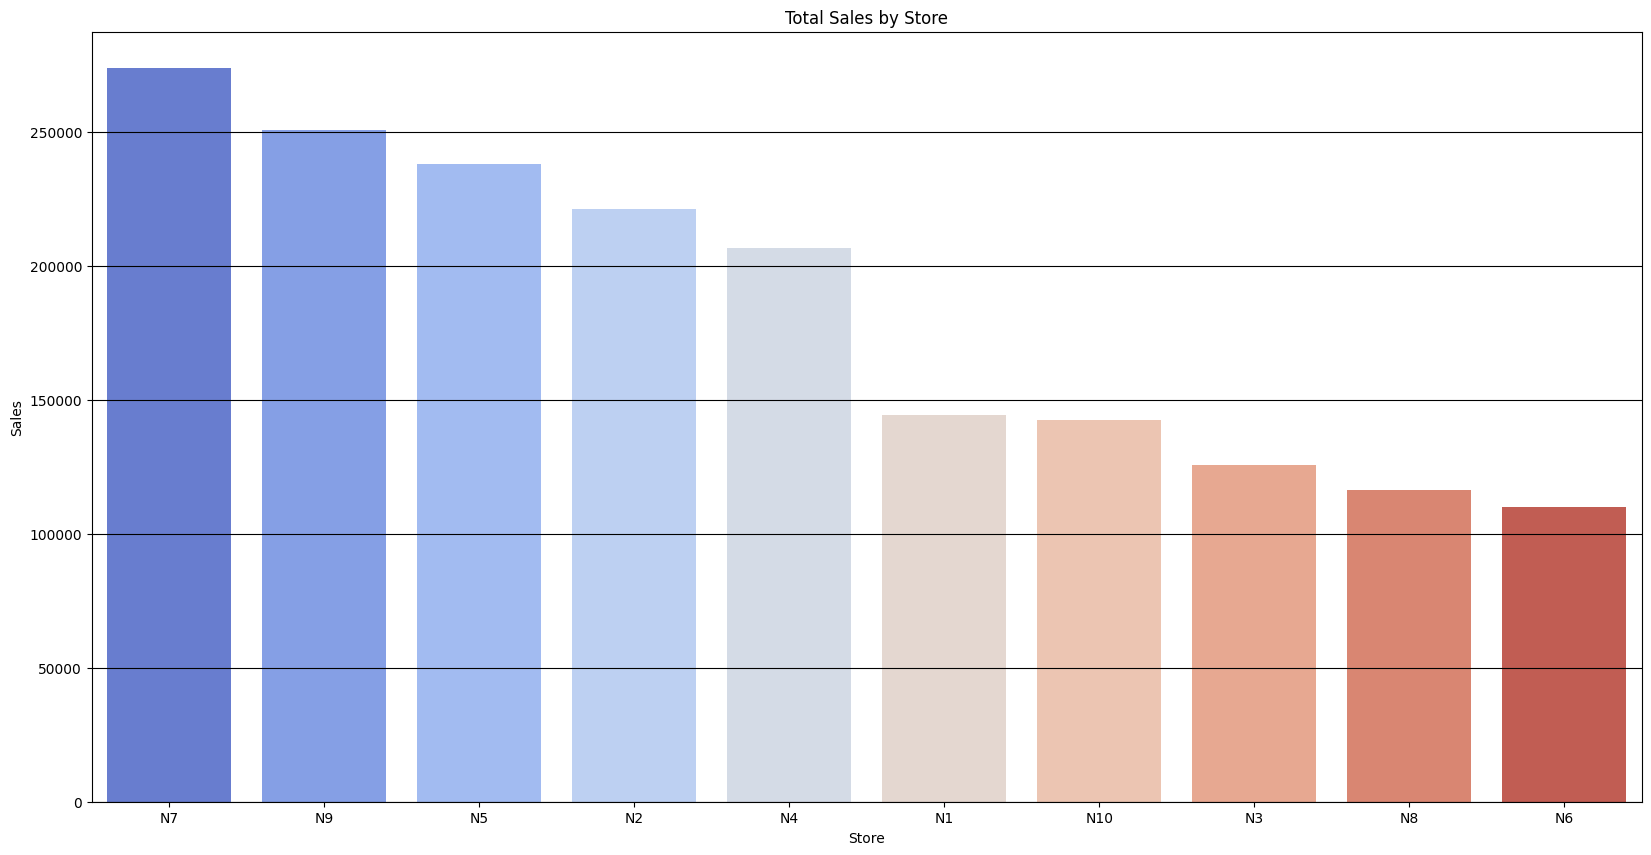

In [18]:


sales_by_store = unique_sales.groupby("STORE").sum().sort_values('BILL_AMT_y', ascending=False)

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=sales_by_store.index, y=sales_by_store['BILL_AMT_y'], data=sales_by_store, palette='coolwarm')

plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Sales")
plt.grid(axis='y', color='black')
plt.show()


<ipython-input-23-ca7644be8134>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["STORECODE"], y=data["BILL_AMT"], palette=custom_palette)
<ipython-input-23-ca7644be8134>:3: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=data["STORECODE"], y=data["BILL_AMT"], palette=custom_palette)


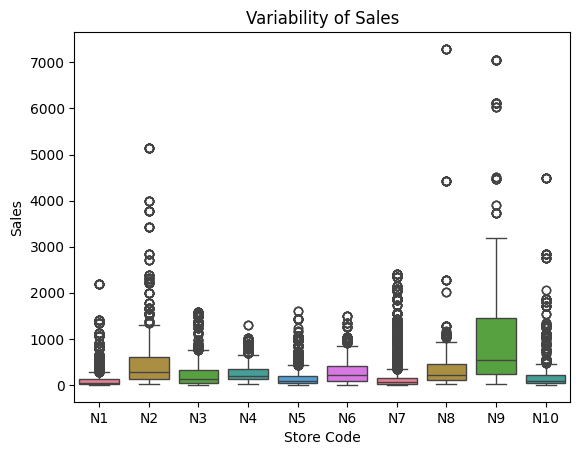

In [23]:

custom_palette = sns.color_palette("husl")

sns.boxplot(x=data["STORECODE"], y=data["BILL_AMT"], palette=custom_palette)

plt.title("Variability of Sales")
plt.ylabel("Sales")
plt.xlabel("Store Code")

plt.show()


<ipython-input-27-20074dcfb396>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store = unique_sales.loc[unique_sales.STORE == i].groupby("DAY_y").sum()
<ipython-input-27-20074dcfb396>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store.index,y=store["BILL_AMT_y"],data=store,palette=custom_palette).axhline(store["BILL_AMT_y"].mean(),color='black')
<ipython-input-27-20074dcfb396>:4: UserWarning: 
The palette list has fewer values (6) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=store.index,y=store["BILL_AMT_y"],data=store,palette=custom_palette).axhline(store["BILL_AMT_y"].mean(),color='black')
<ip

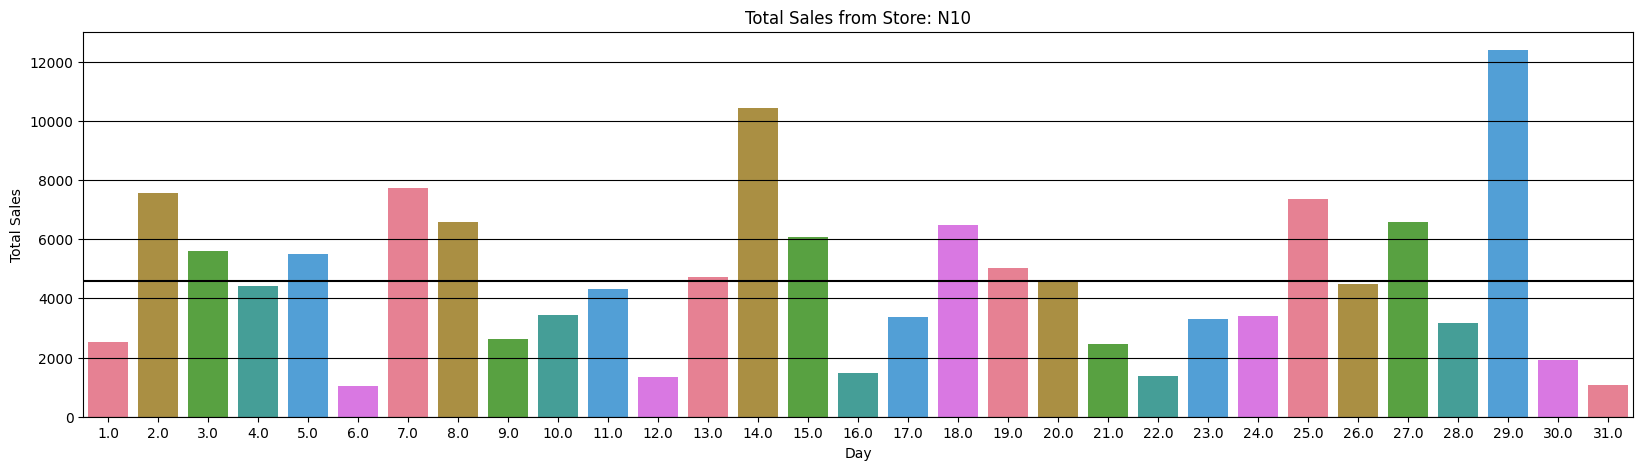

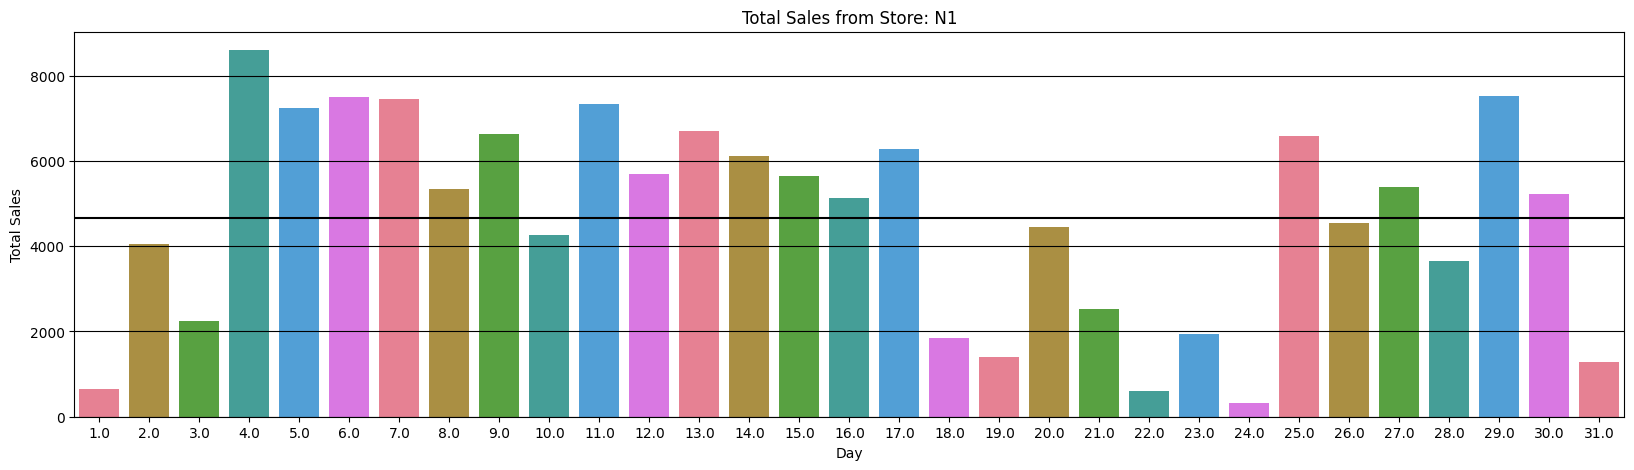

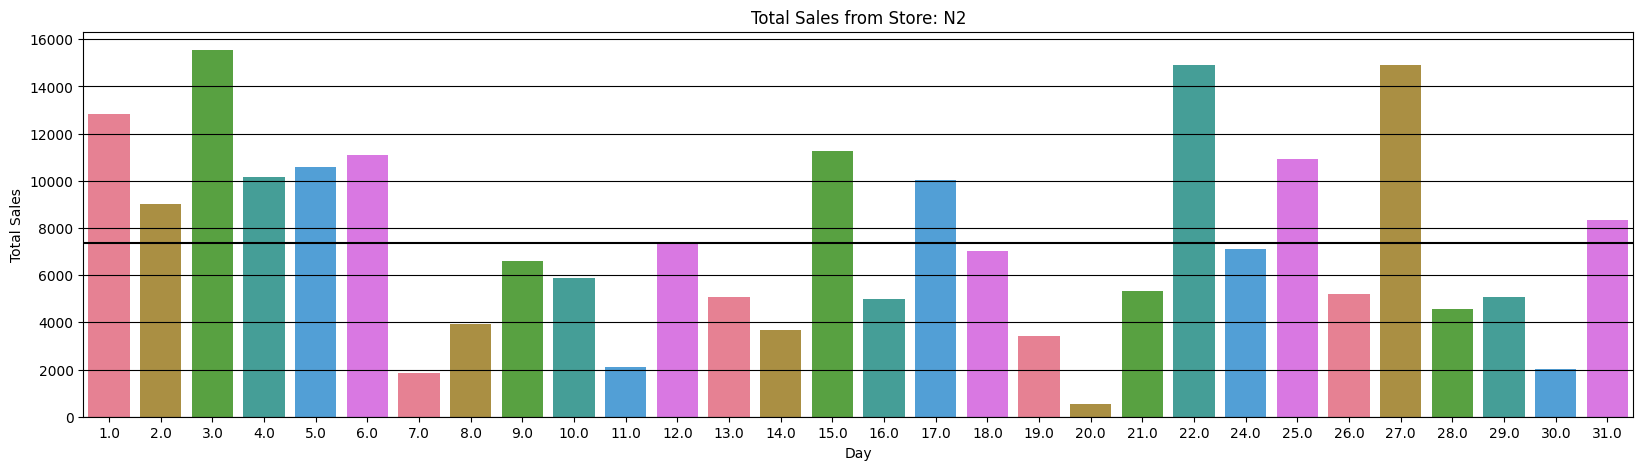

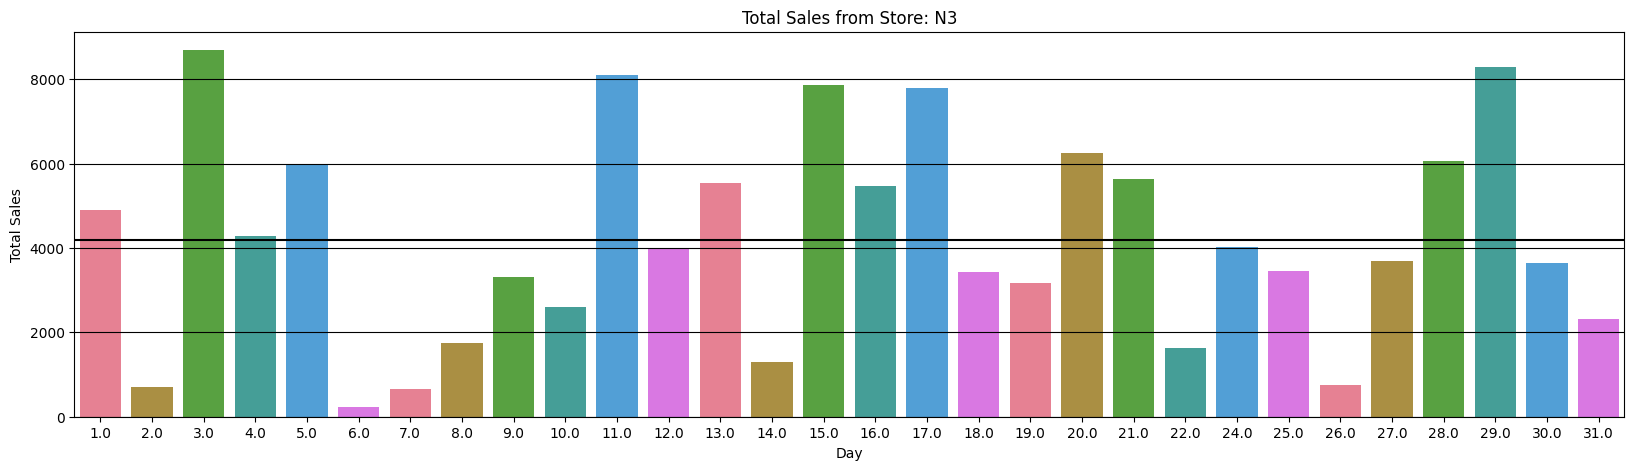

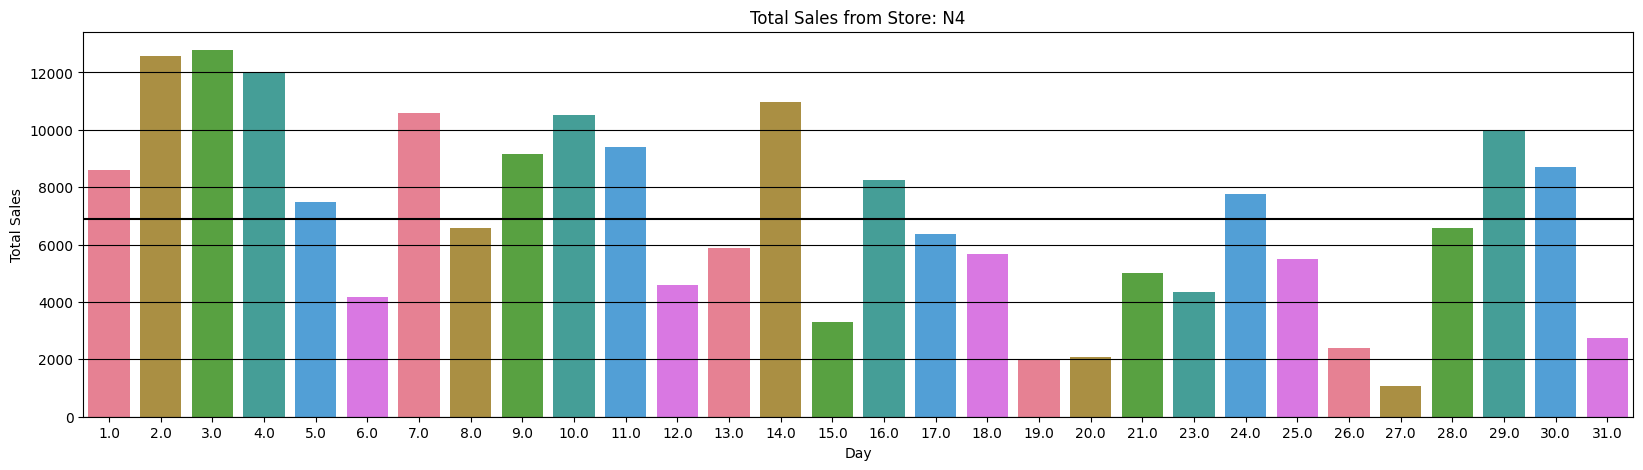

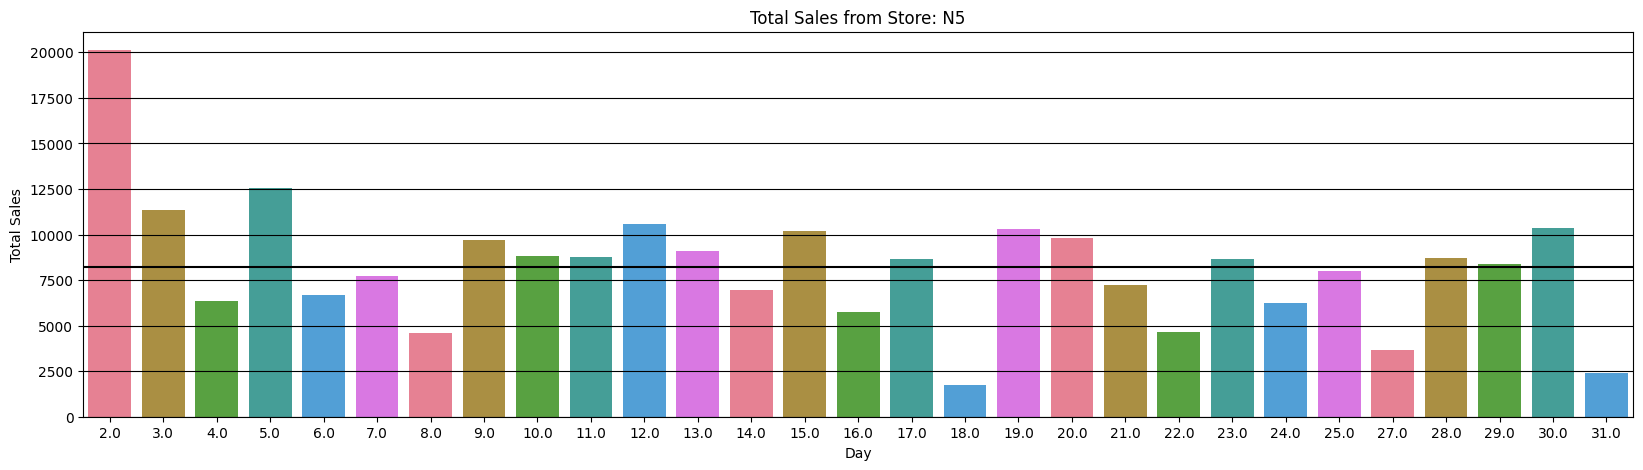

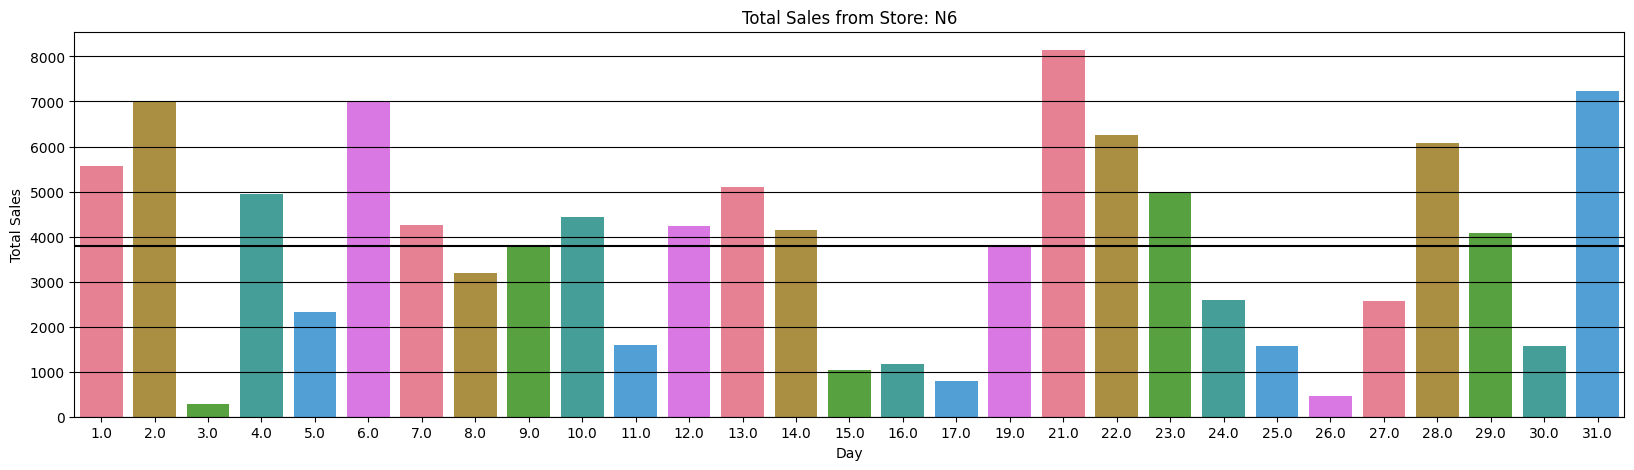

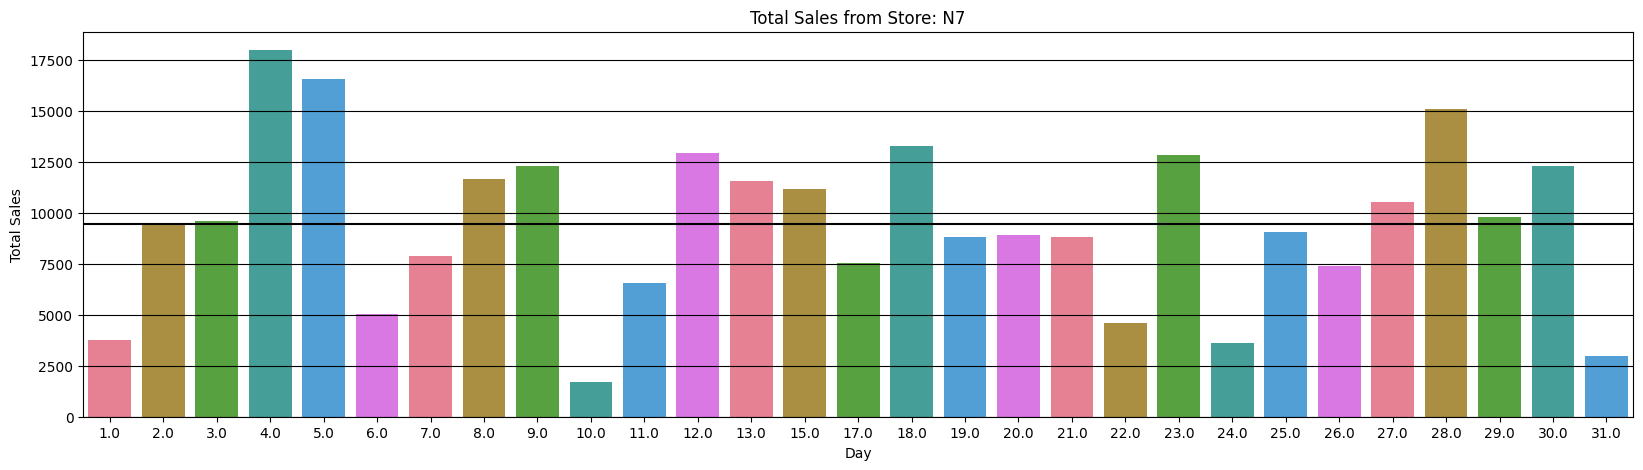

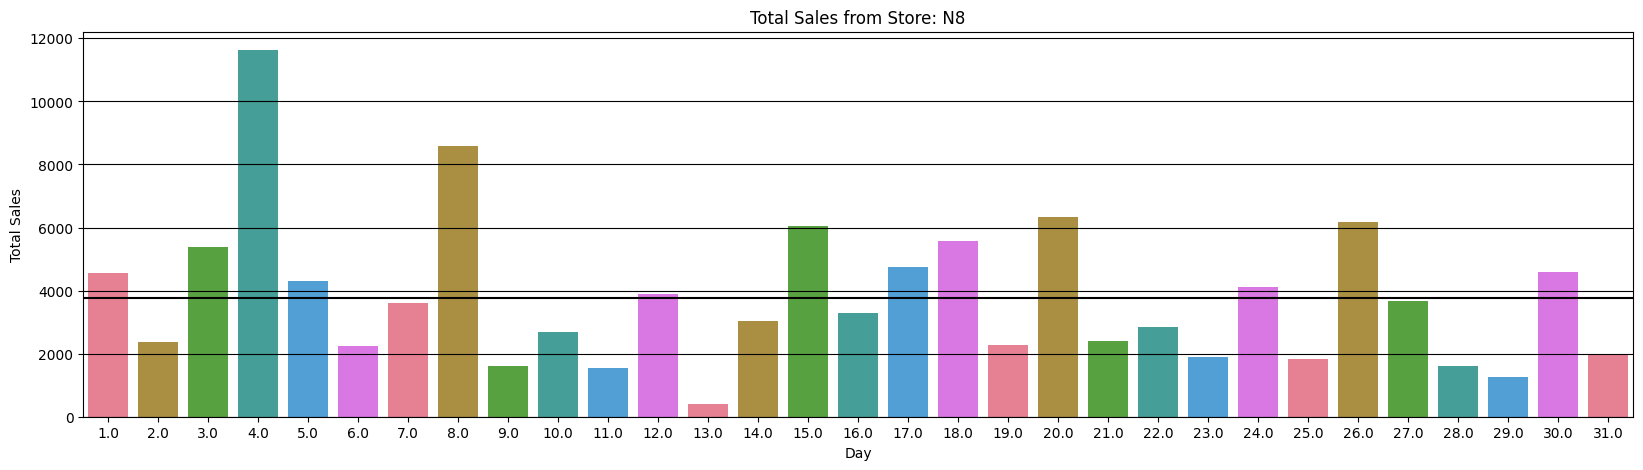

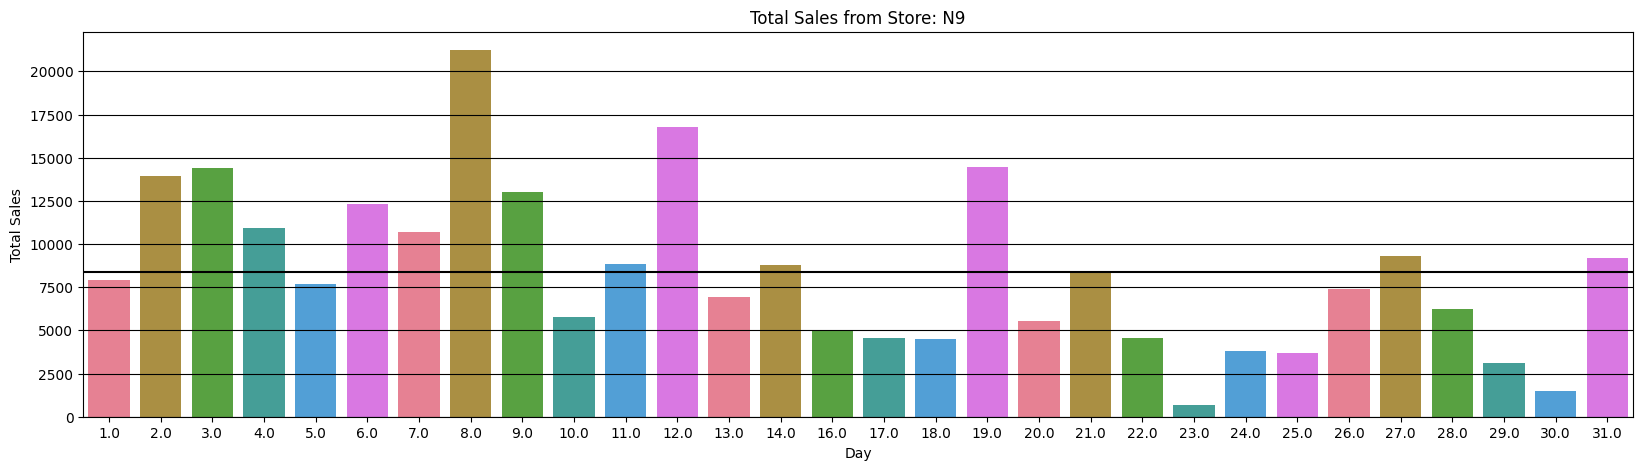

In [27]:
for i in unique_sales.STORE.unique():
    store = unique_sales.loc[unique_sales.STORE == i].groupby("DAY_y").sum()
    plt.figure(figsize=(20,5))
    sns.barplot(x=store.index,y=store["BILL_AMT_y"],data=store,palette=custom_palette).axhline(store["BILL_AMT_y"].mean(),color='black')
    plt.title("Total Sales from Store: " + i)
    plt.xlabel("Day")
    plt.ylabel("Total Sales")
    plt.grid(axis='y',color='black')

<ipython-input-36-2f5df28f7987>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_items_sales = merged.groupby('BRD').sum().sort_values("VALUE",ascending=False)[['QTY_x','PRICE','VALUE']][0:25]


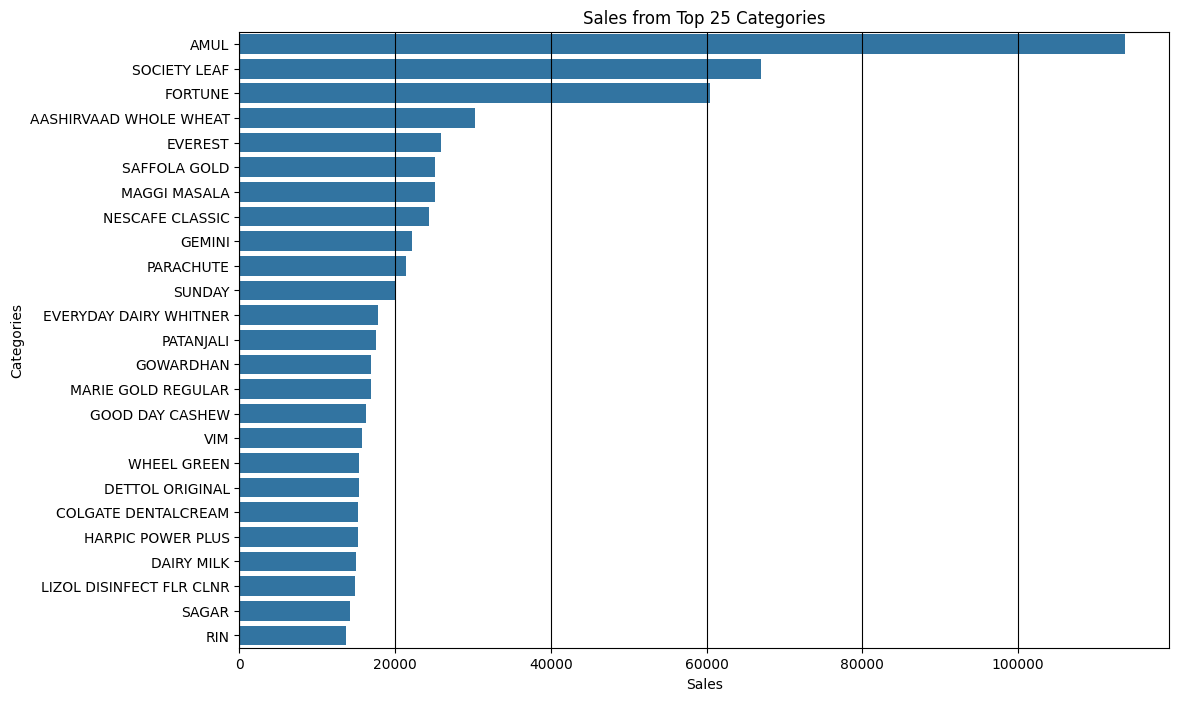

In [36]:
top_items_sales = merged.groupby('BRD').sum().sort_values("VALUE",ascending=False)[['QTY_x','PRICE','VALUE']][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='VALUE',y=top_items_sales.index,data=top_items_sales)
plt.title("Sales from Top 25 Categories")
plt.xlabel("Sales")
plt.ylabel("Categories")
plt.grid(axis='x',color='black');

<ipython-input-33-4b0f6da0cc53>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store = unique_sales.loc[unique_sales.STORE == i].groupby("DAY_y").mean()
<ipython-input-33-4b0f6da0cc53>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store.index,y=store["BILL_AMT_y"],data=store,palette="muted").axhline(store["BILL_AMT_y"].mean(),color='purple')
<ipython-input-33-4b0f6da0cc53>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store = unique_sales.loc[unique

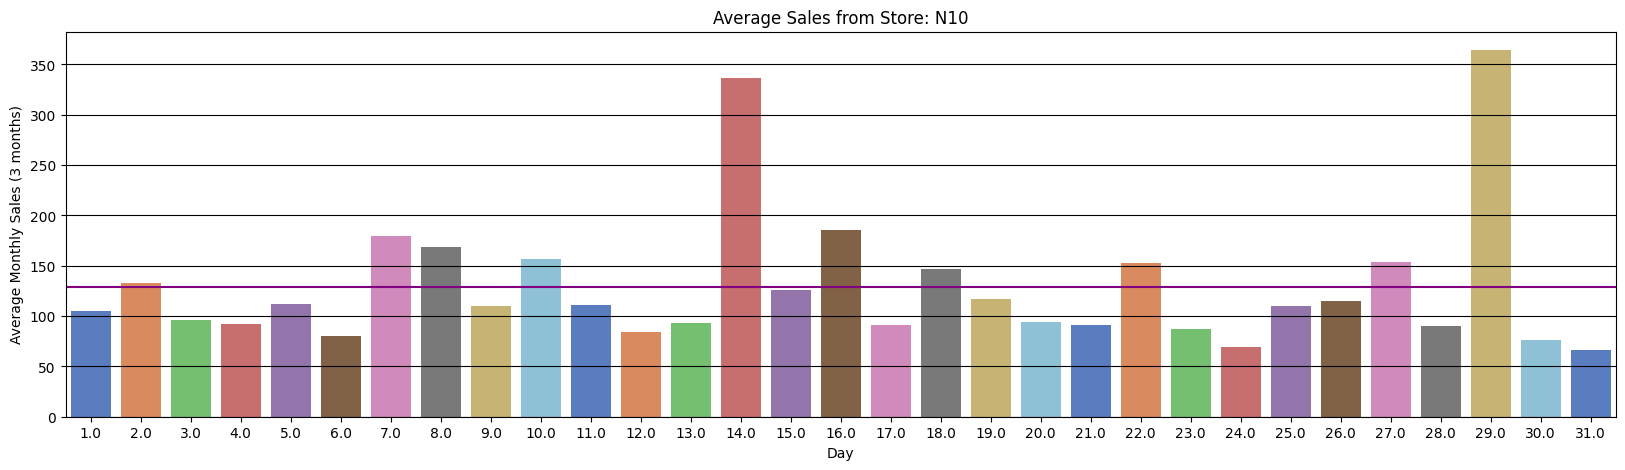

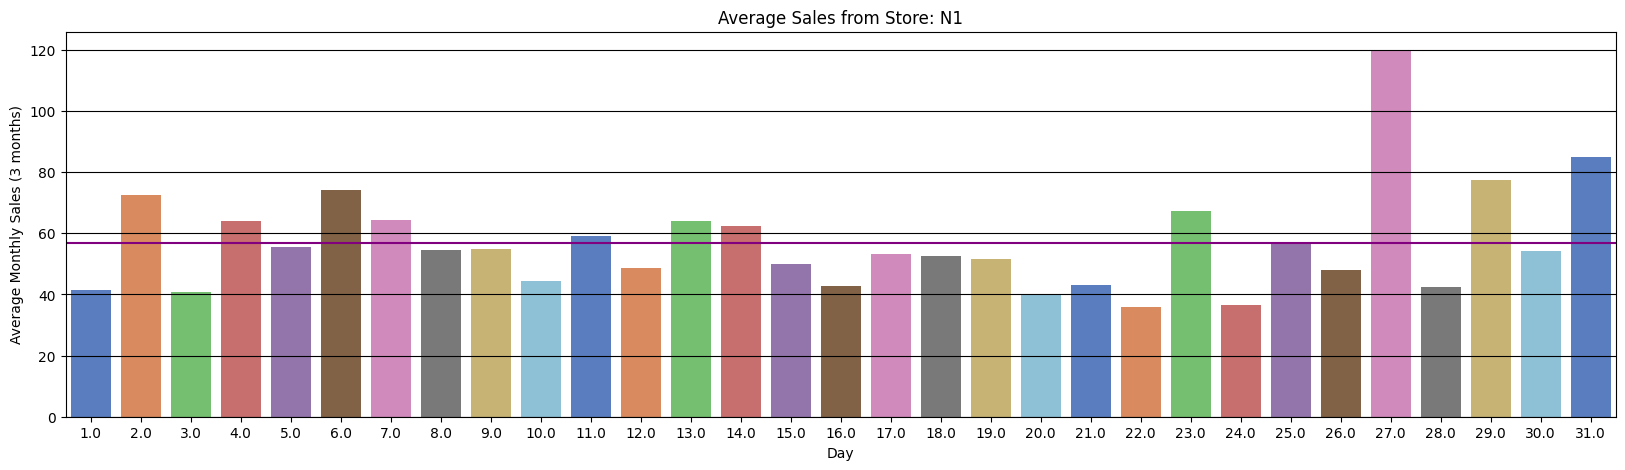

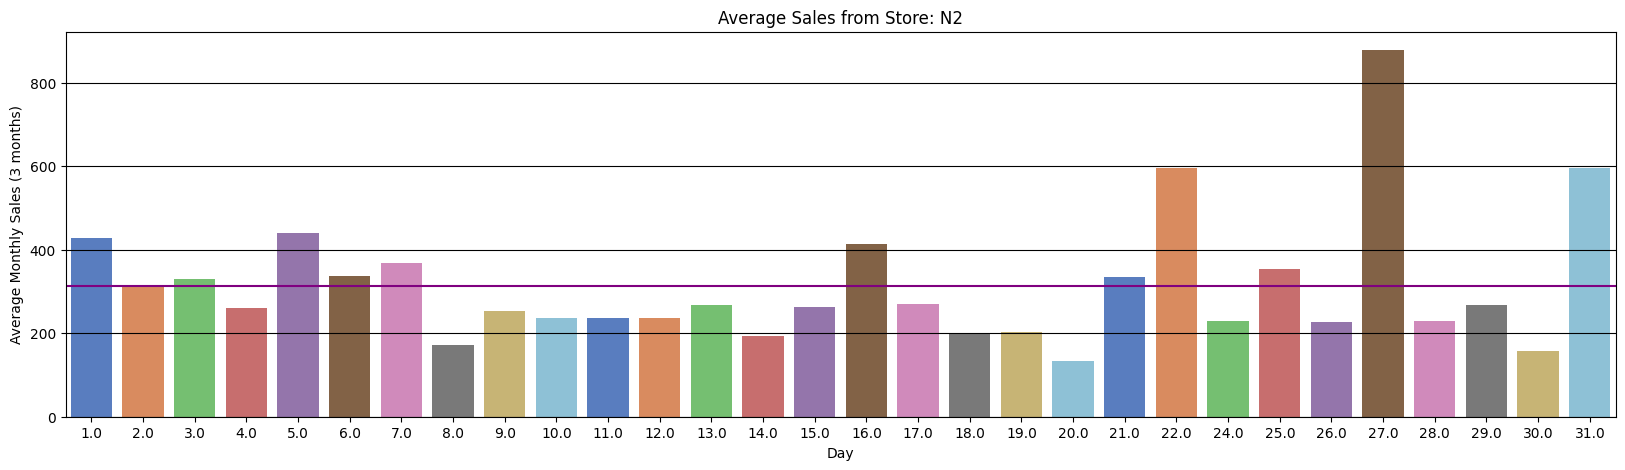

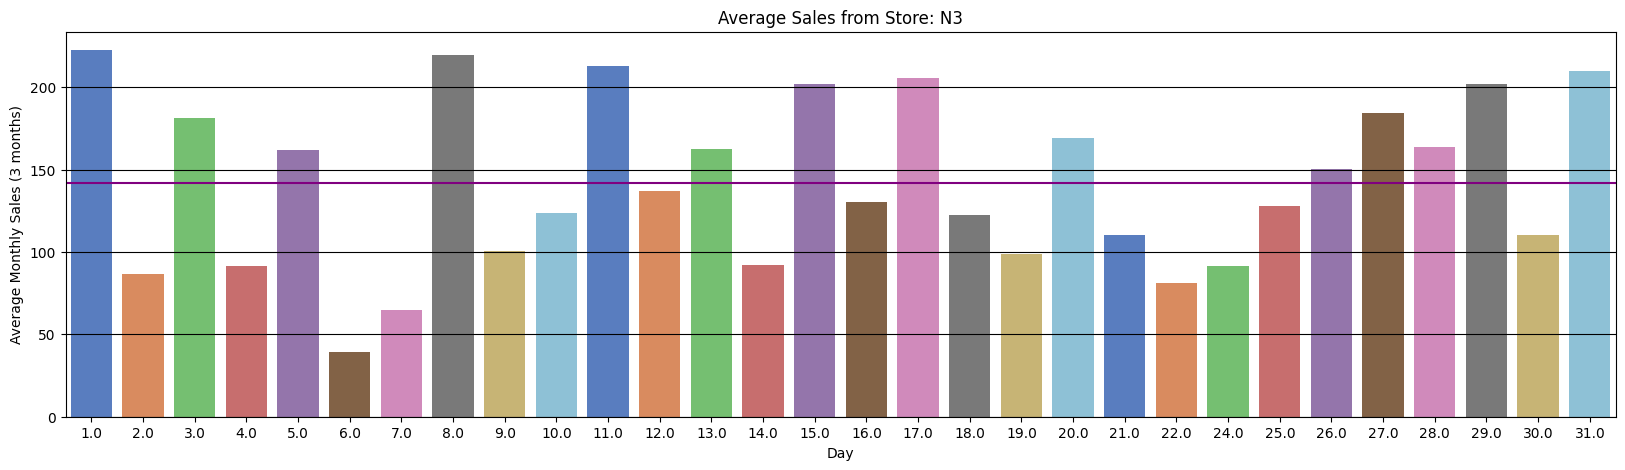

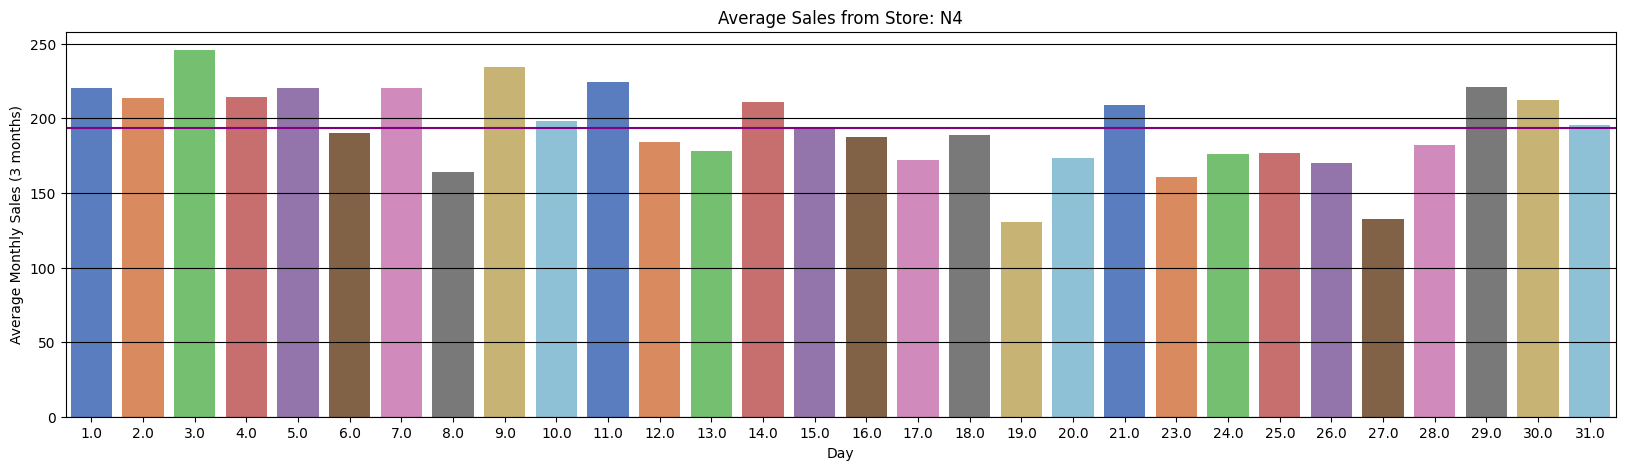

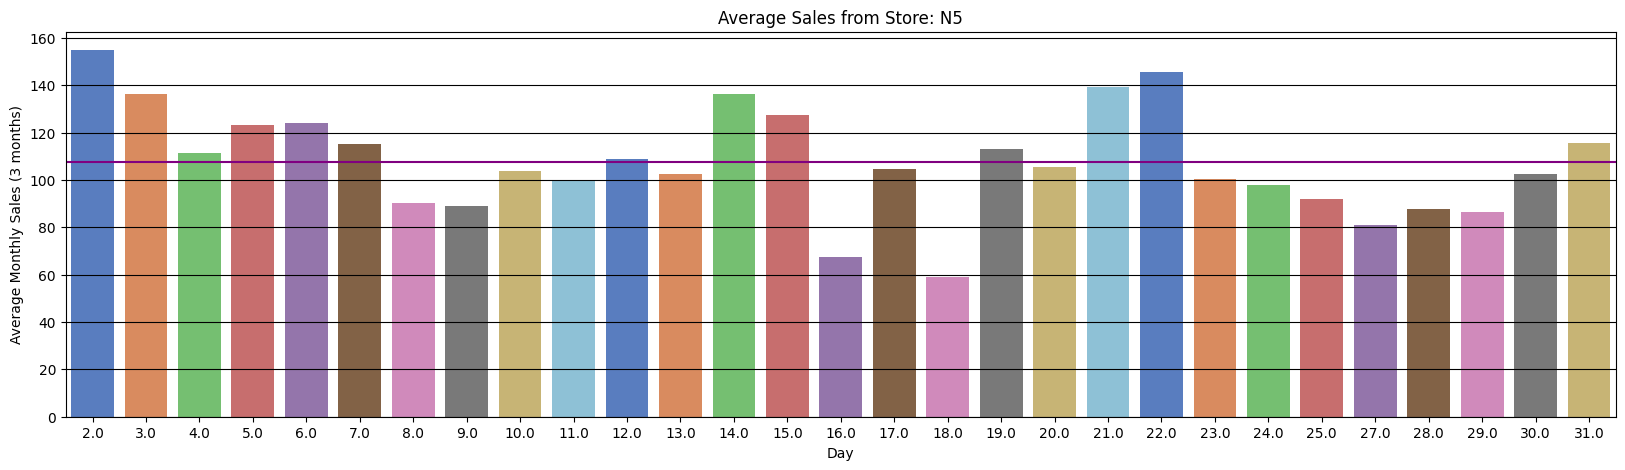

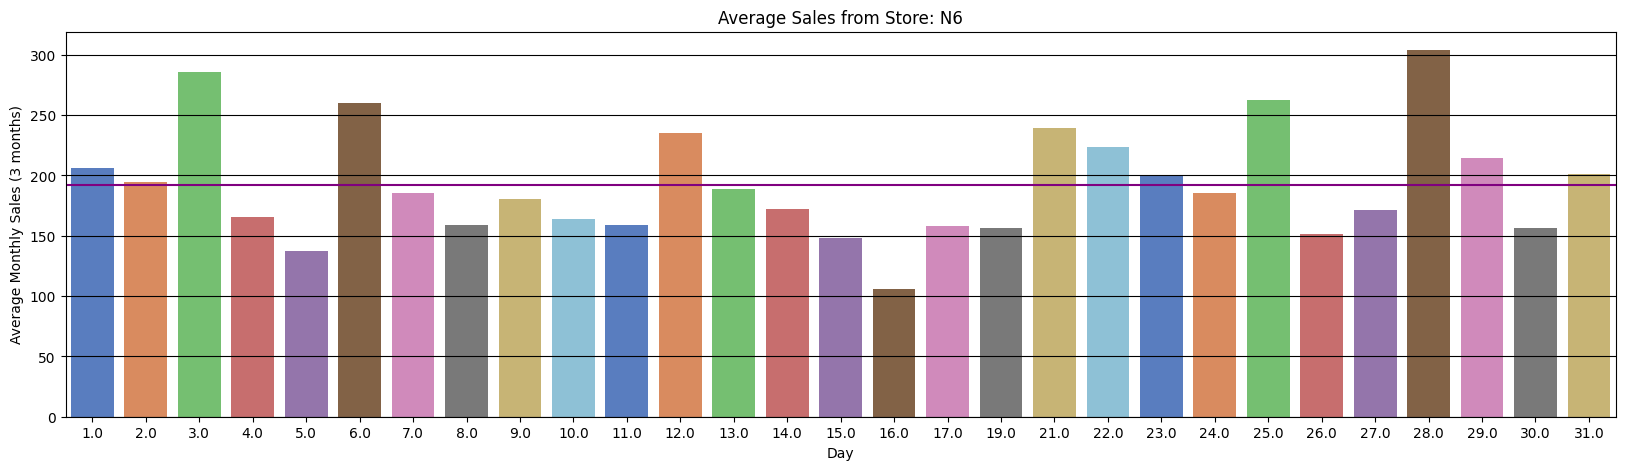

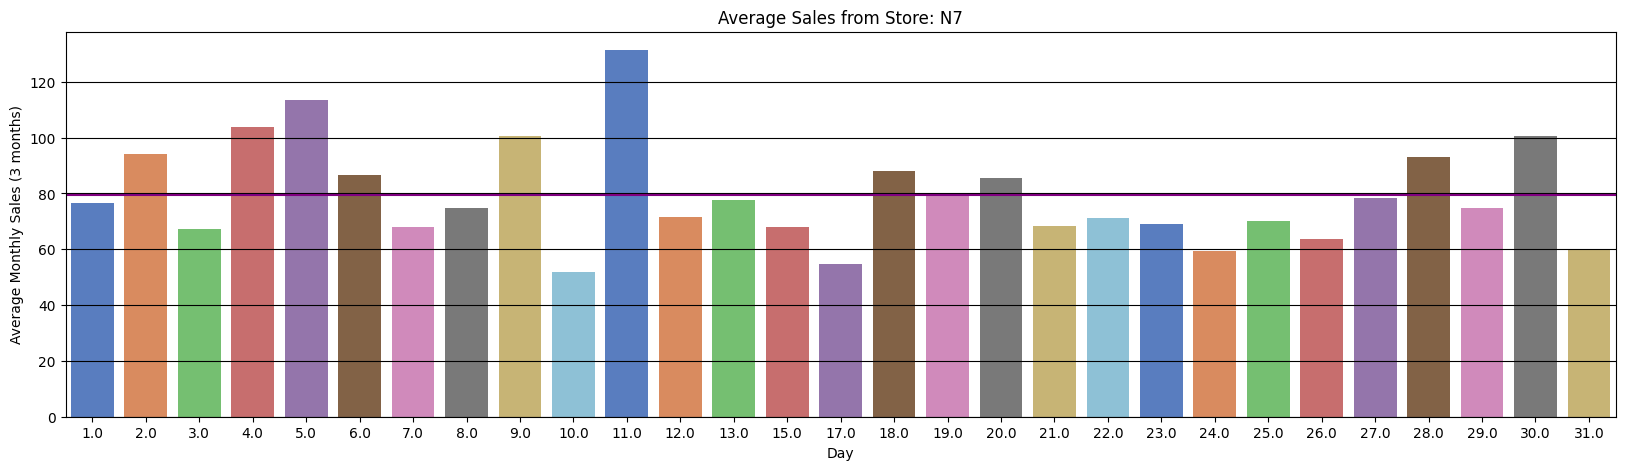

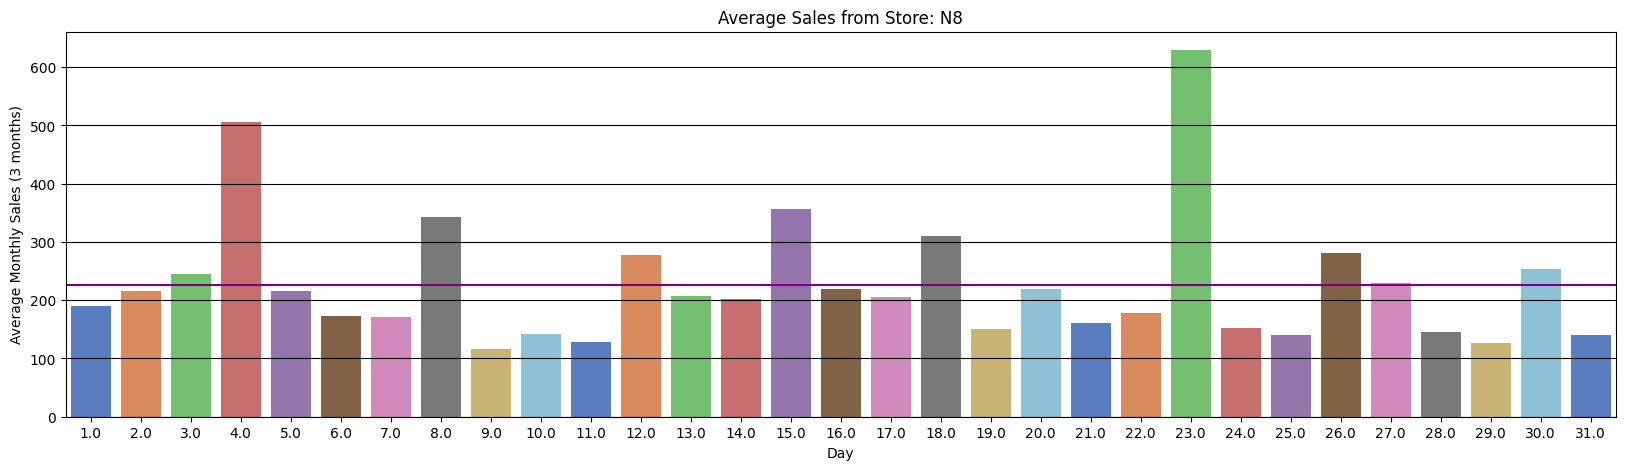

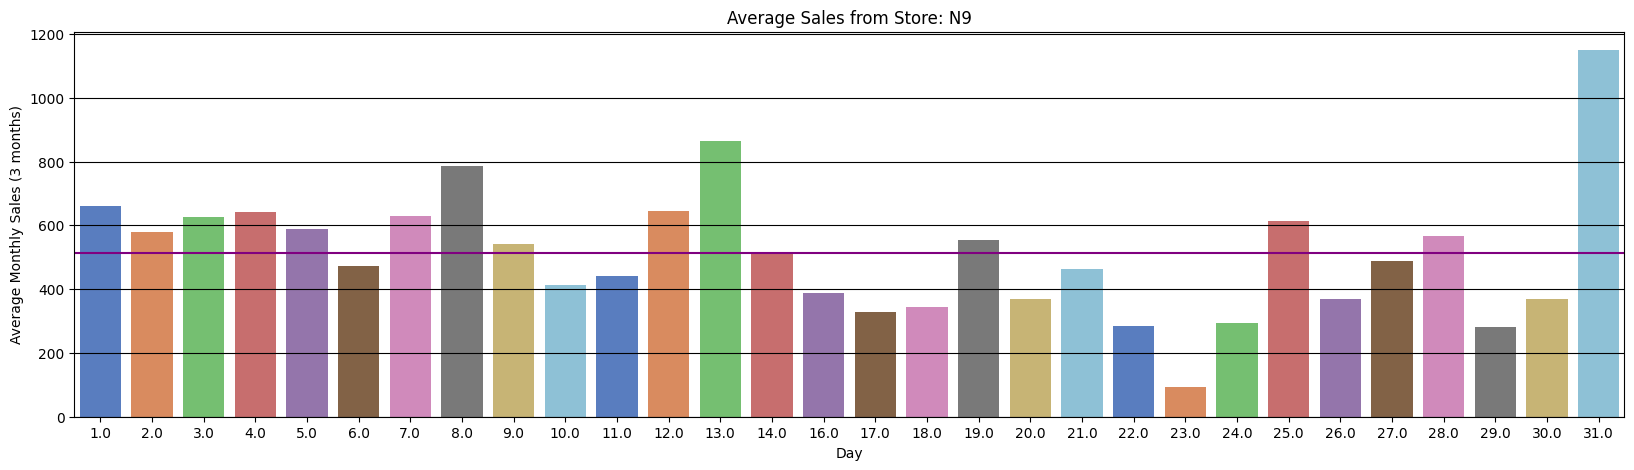

In [33]:
for i in unique_sales.STORE.unique():
    store = unique_sales.loc[unique_sales.STORE == i].groupby("DAY_y").mean()
    plt.figure(figsize=(20,5))
    sns.barplot(x=store.index,y=store["BILL_AMT_y"],data=store,palette="muted").axhline(store["BILL_AMT_y"].mean(),color='purple')
    plt.title("Average Sales from Store: " + i)
    plt.xlabel("Day")
    plt.ylabel("Average Monthly Sales (3 months)")
    plt.grid(axis='y',color='black')

<ipython-input-40-6cef0c58ec8b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = merged.loc[data.STORECODE == i].groupby("SGRP").sum().sort_values("QTY_x",ascending=False)[["VALUE","QTY_x"]][0:25]
<ipython-input-40-6cef0c58ec8b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VALUE',y=x.index,data=x,palette='magma')
<ipython-input-40-6cef0c58ec8b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = merged.loc[data.STORECODE == i].groupby("SGRP").sum().

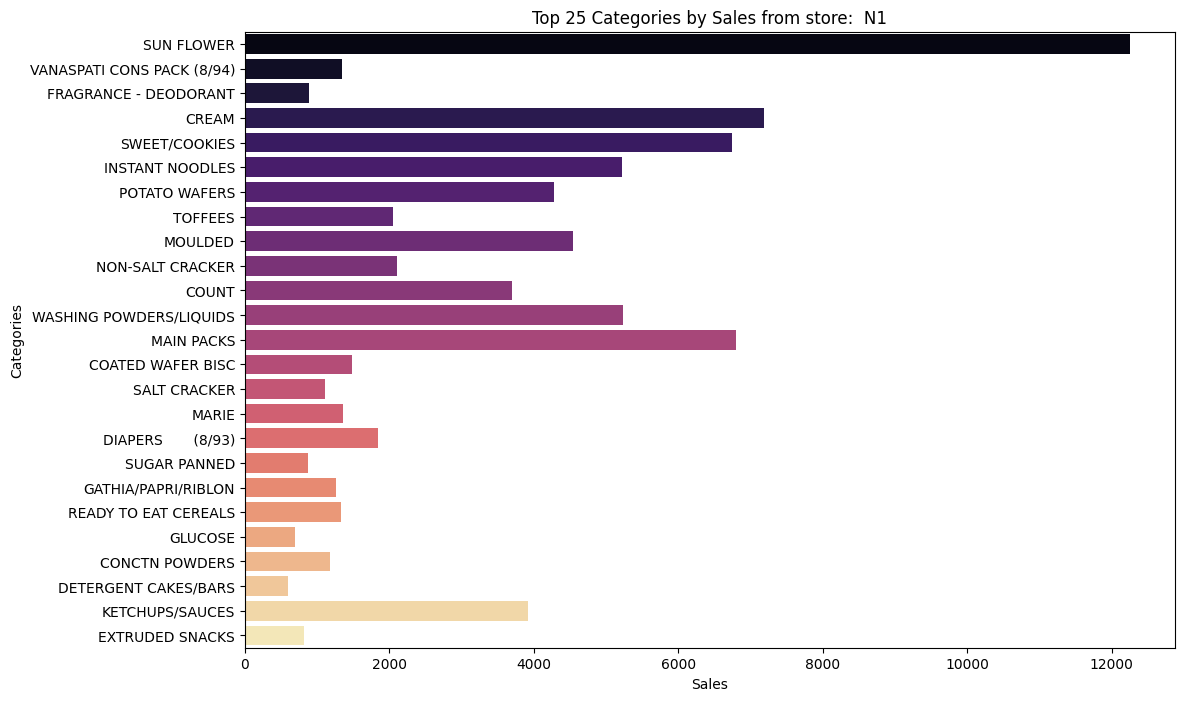

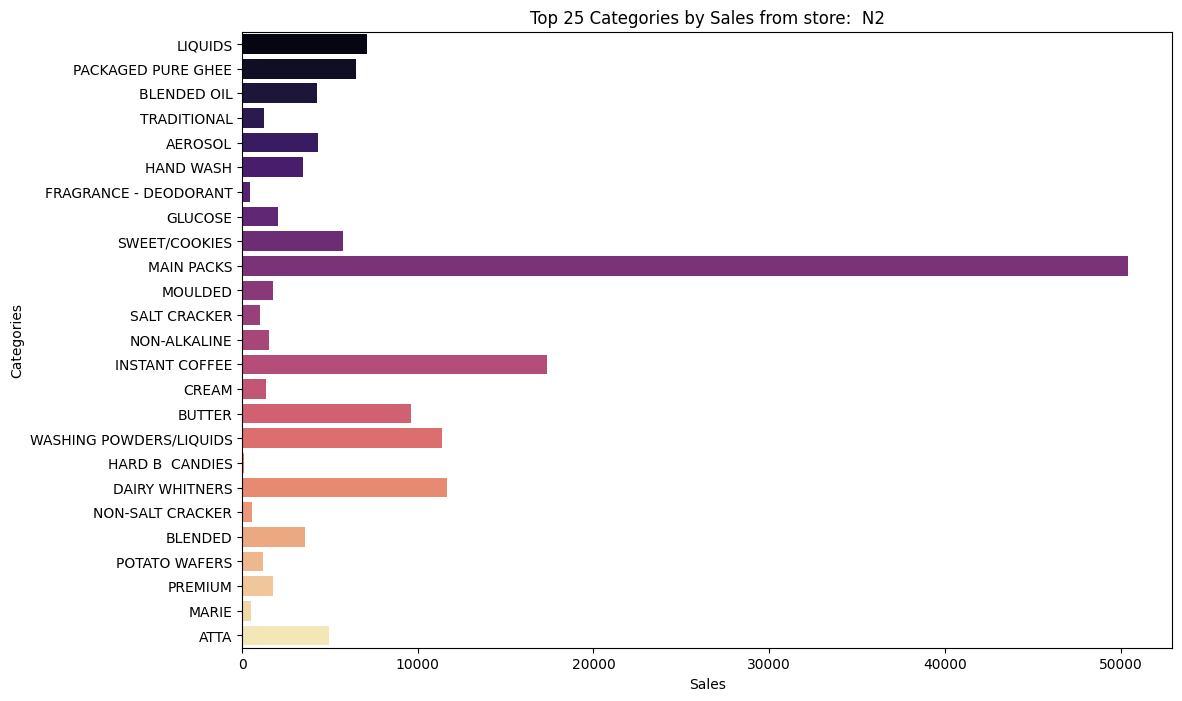

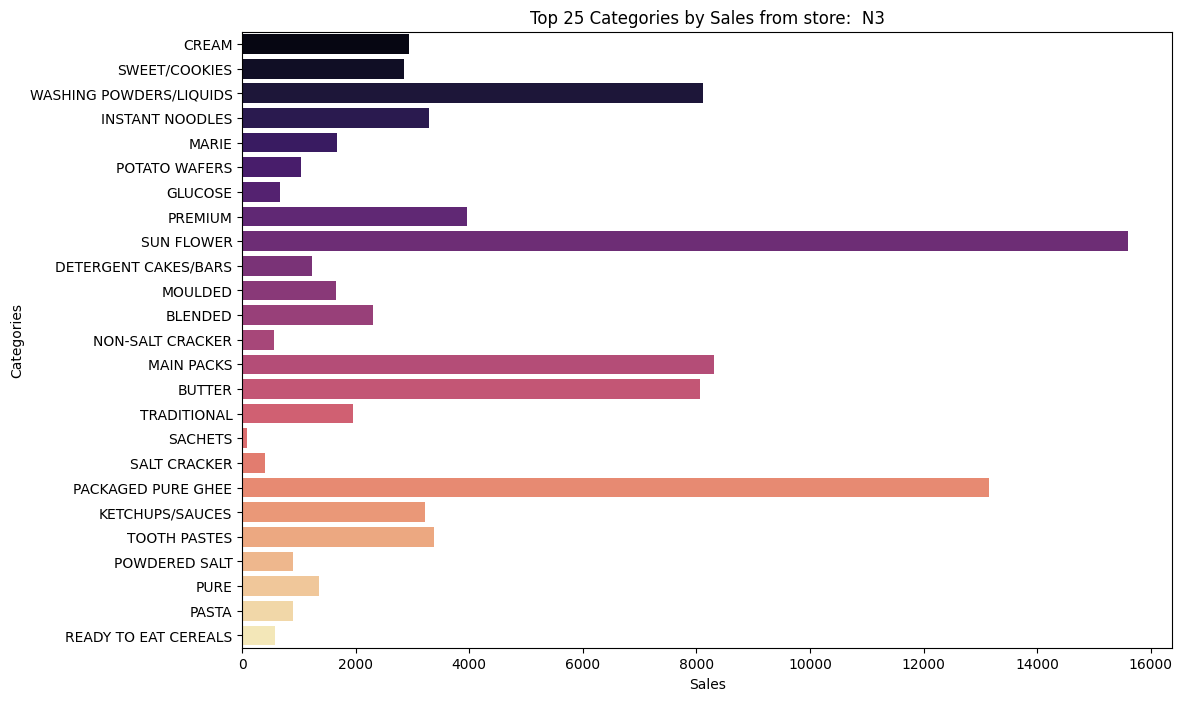

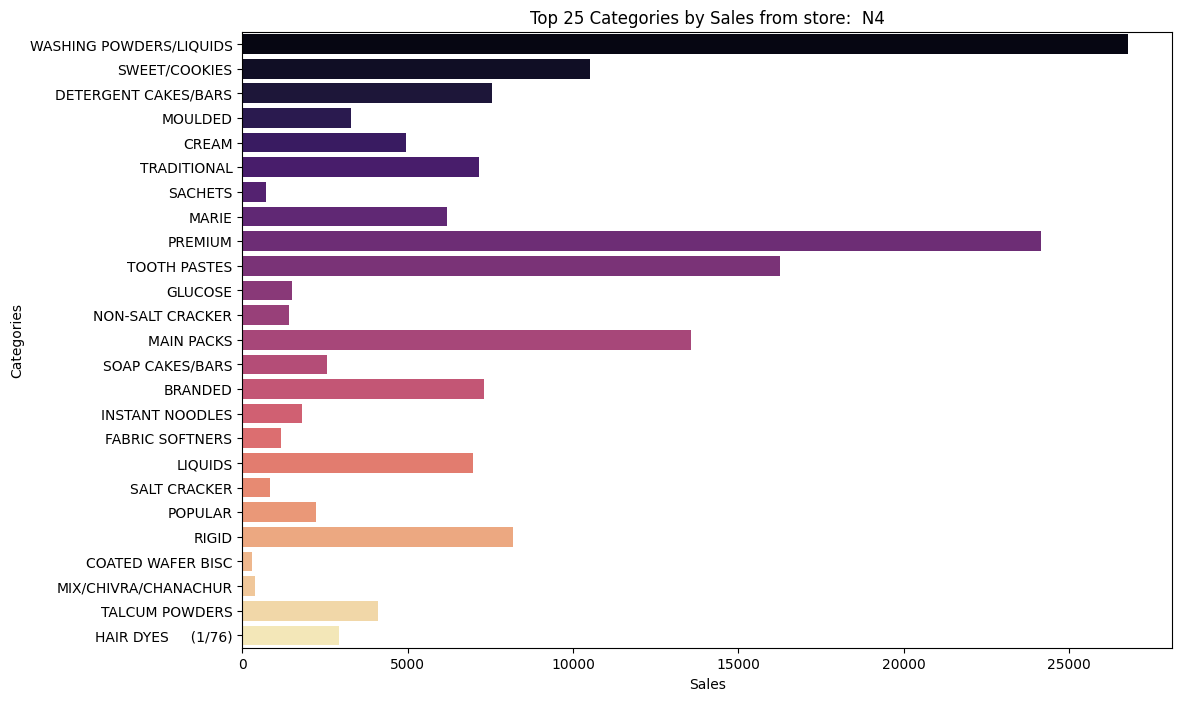

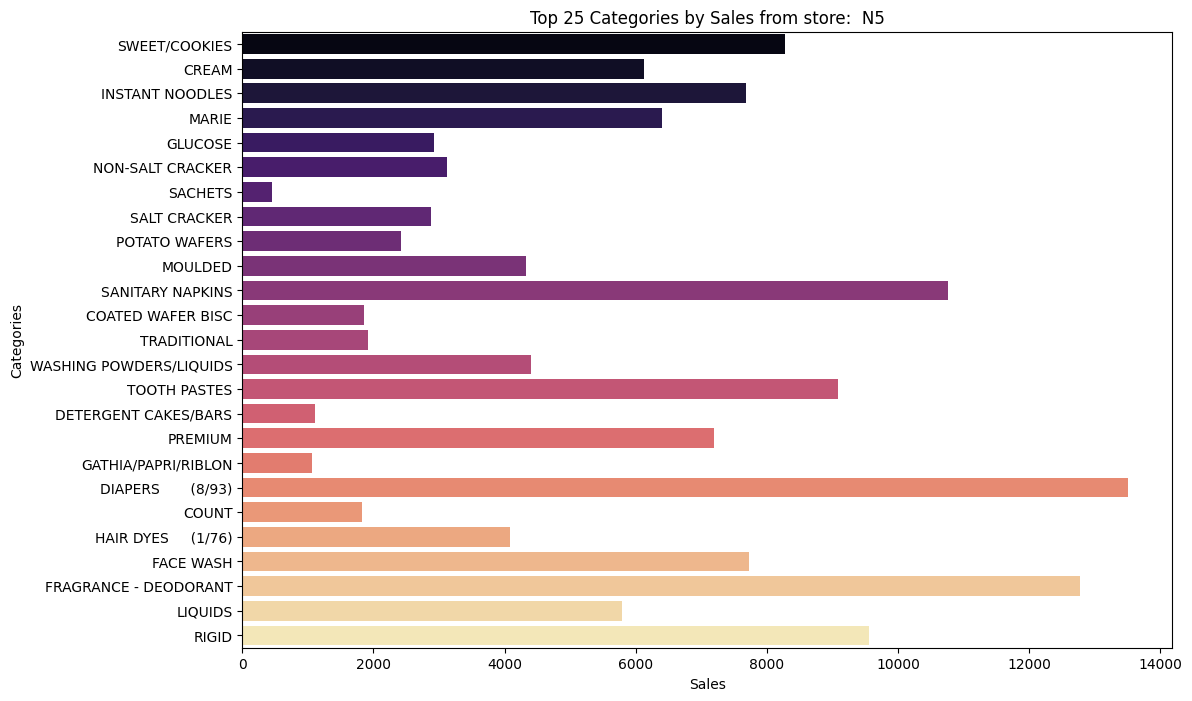

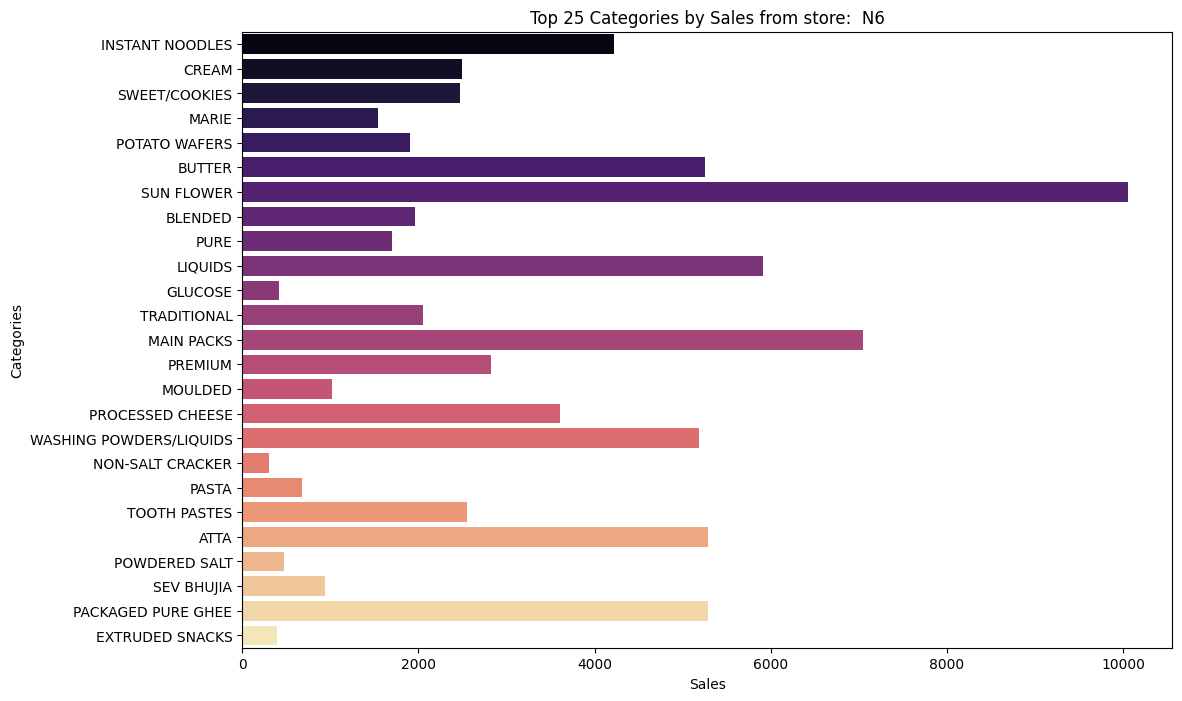

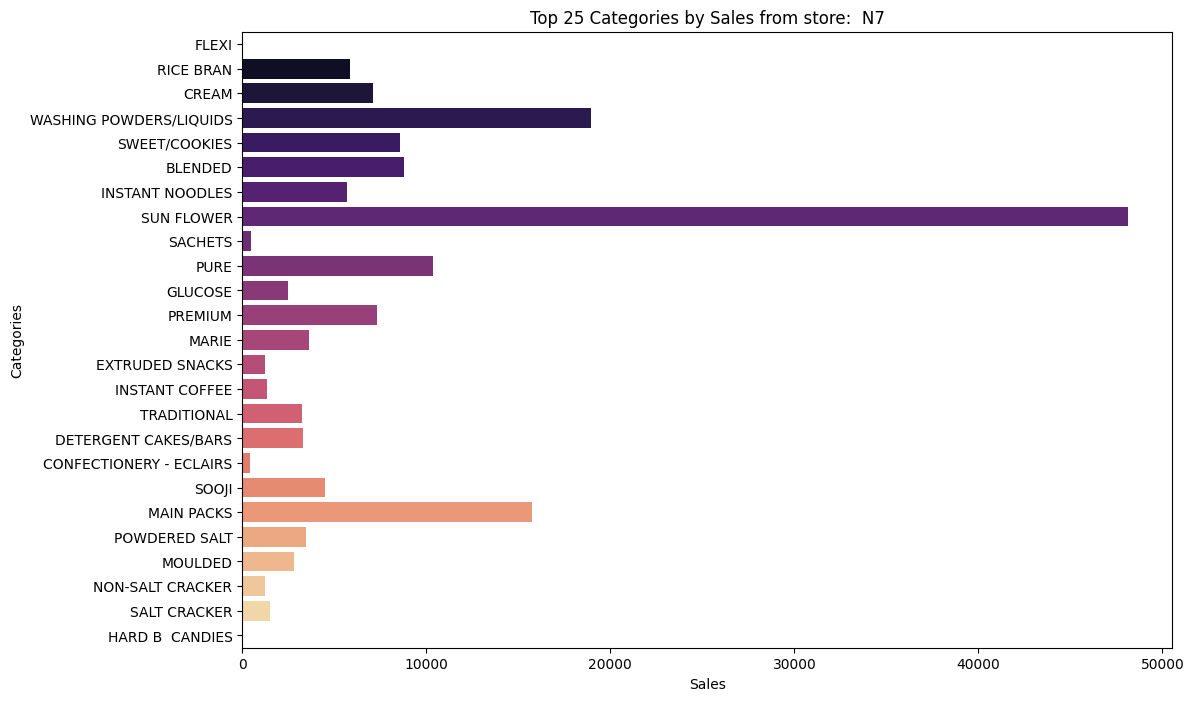

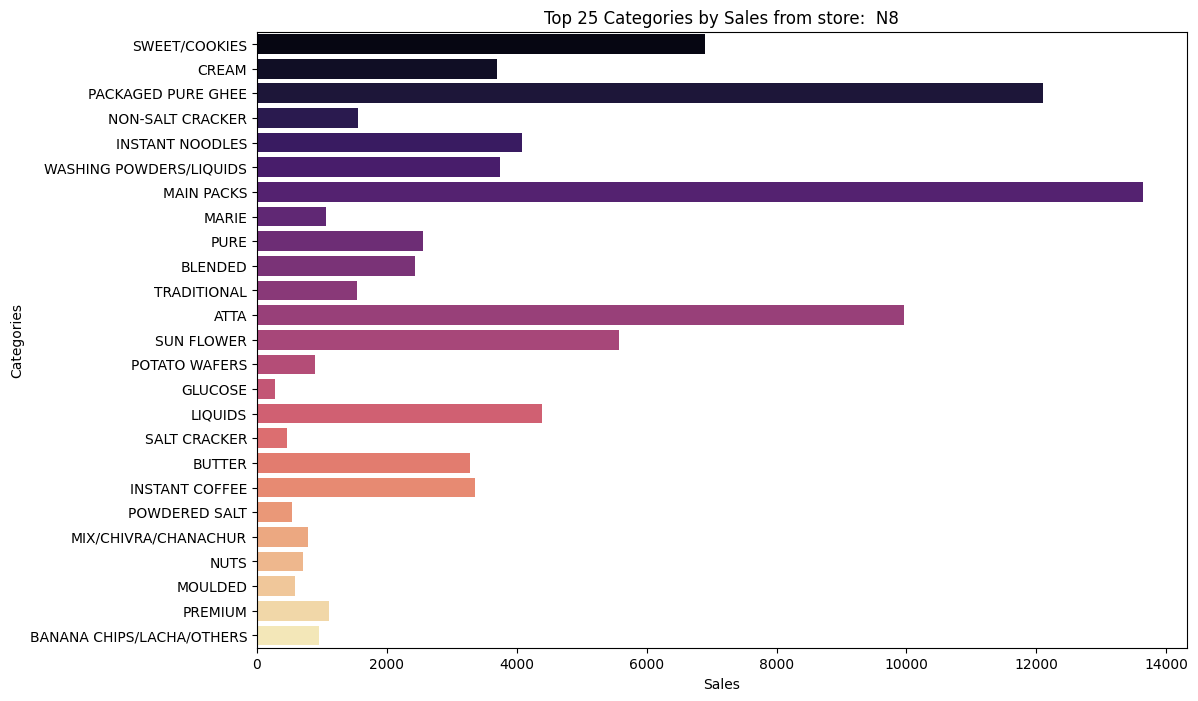

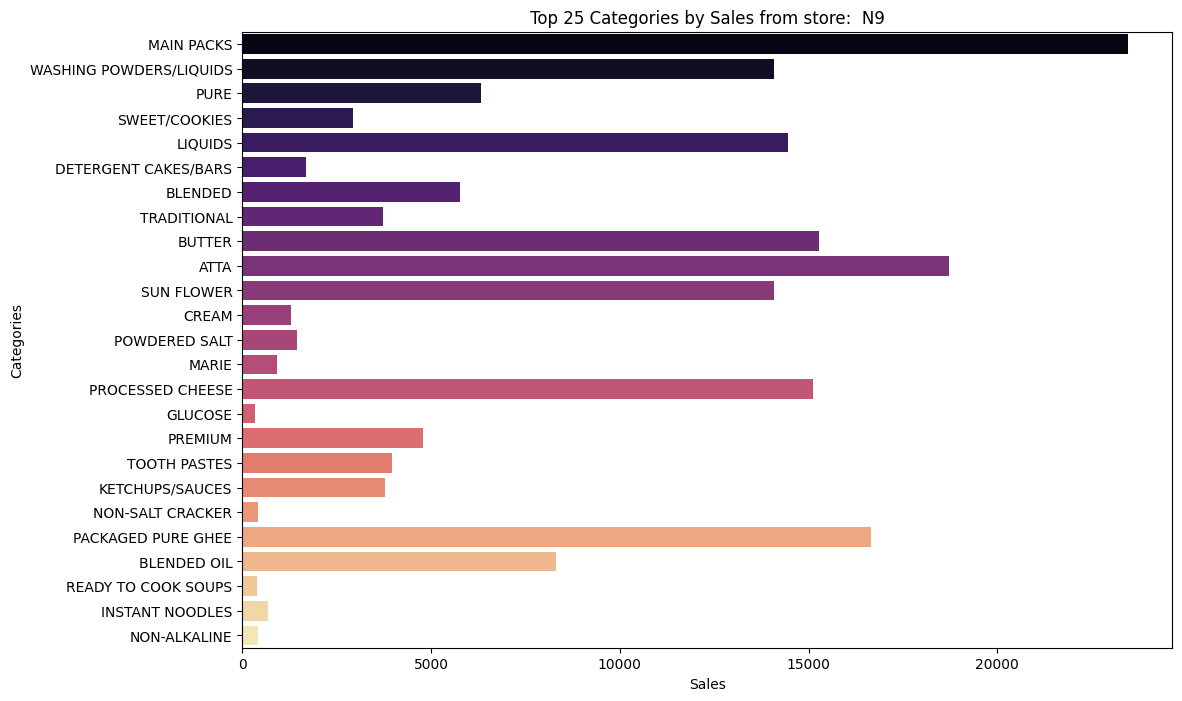

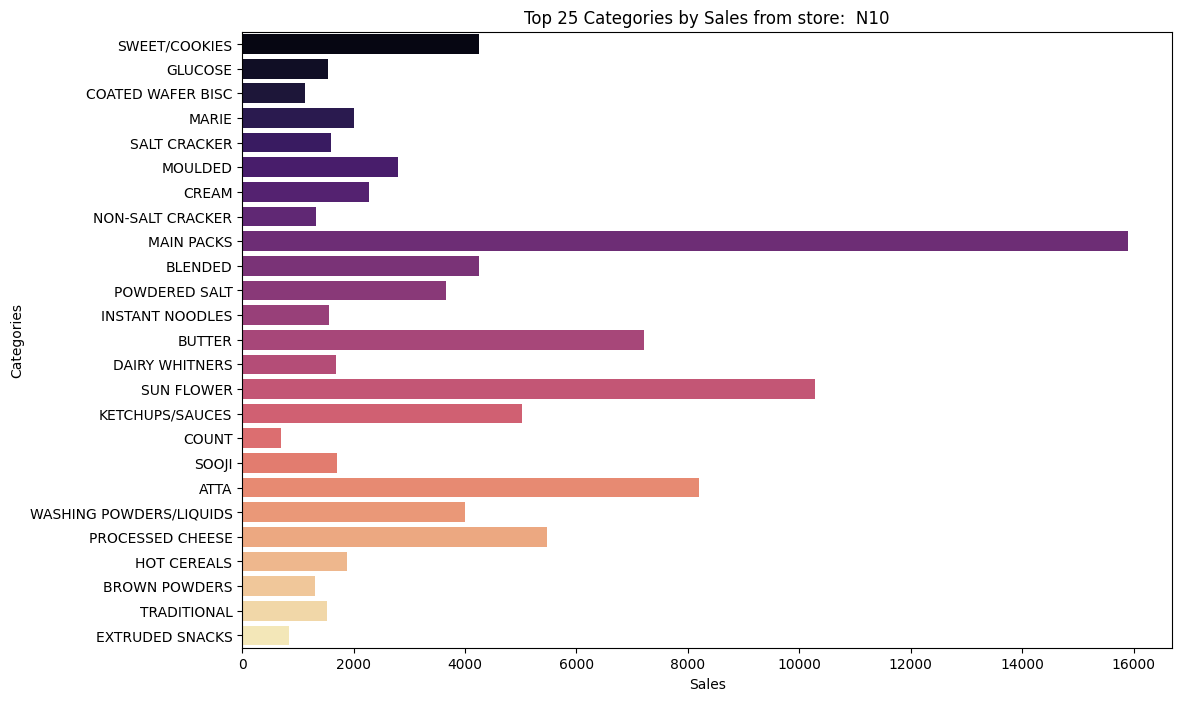

In [40]:
for i in merged.STORECODE.unique():
    x = merged.loc[data.STORECODE == i].groupby("SGRP").sum().sort_values("QTY_x",ascending=False)[["VALUE","QTY_x"]][0:25]
    plt.figure(figsize=(12,8))
    sns.barplot(x='VALUE',y=x.index,data=x,palette='magma')
    plt.title("Top 25 Categories by Sales from store:  " + i)
    plt.ylabel("Categories")
    plt.xlabel("Sales")

<ipython-input-43-183f2d19c0bb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = merged.loc[data.STORECODE == i].groupby("GRP").sum().sort_values("QTY_x",ascending=False)[["VALUE","QTY_x"]][0:25]
<ipython-input-43-183f2d19c0bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VALUE',y=x.index,data=x,palette='plasma')
<ipython-input-43-183f2d19c0bb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = merged.loc[data.STORECODE == i].groupby("GRP").sum().s

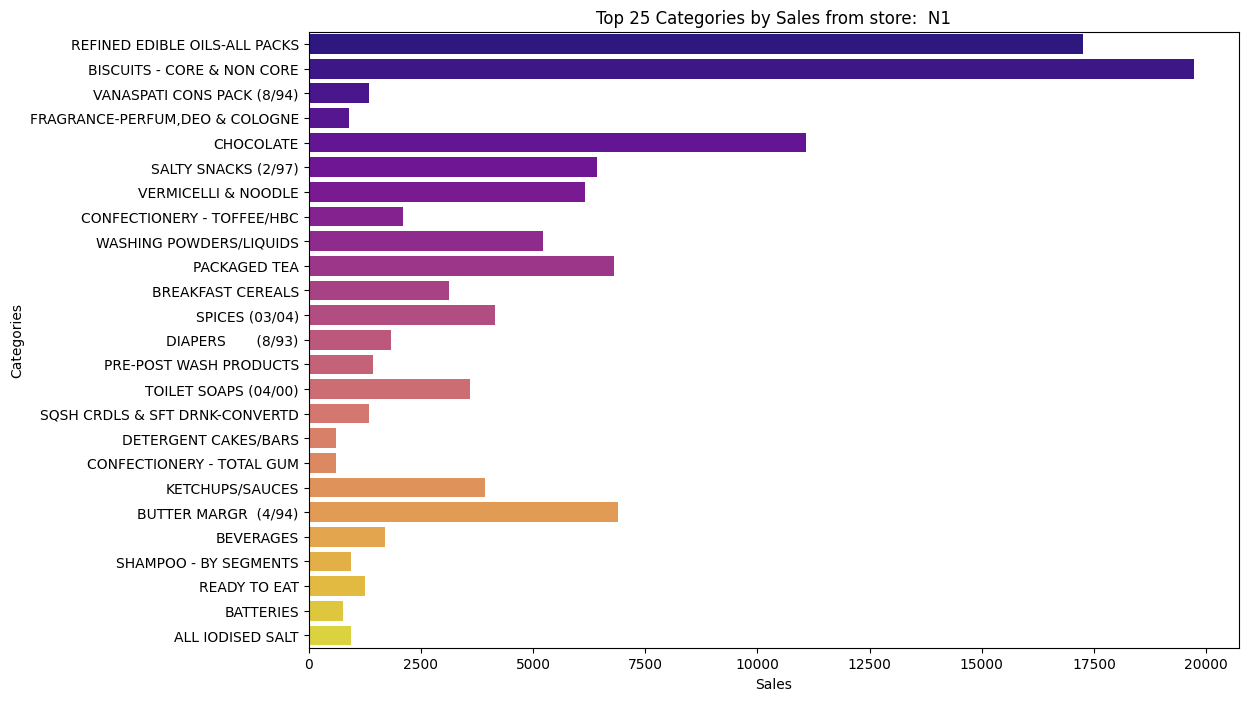

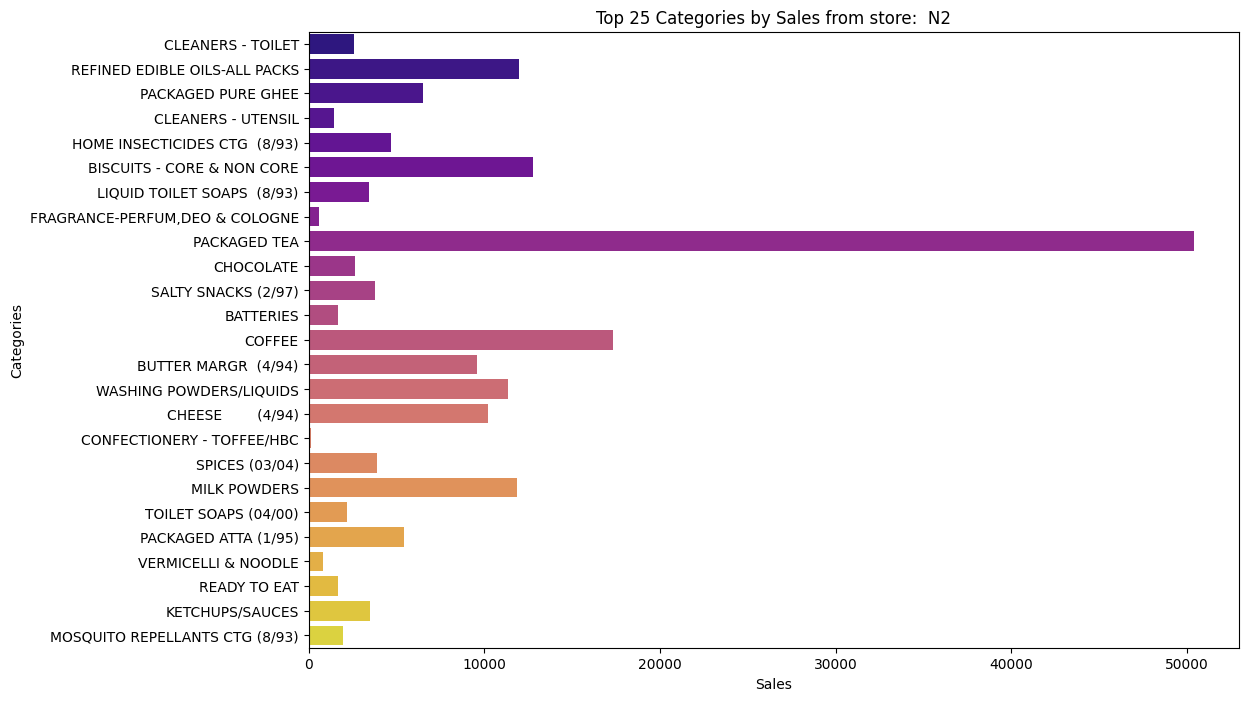

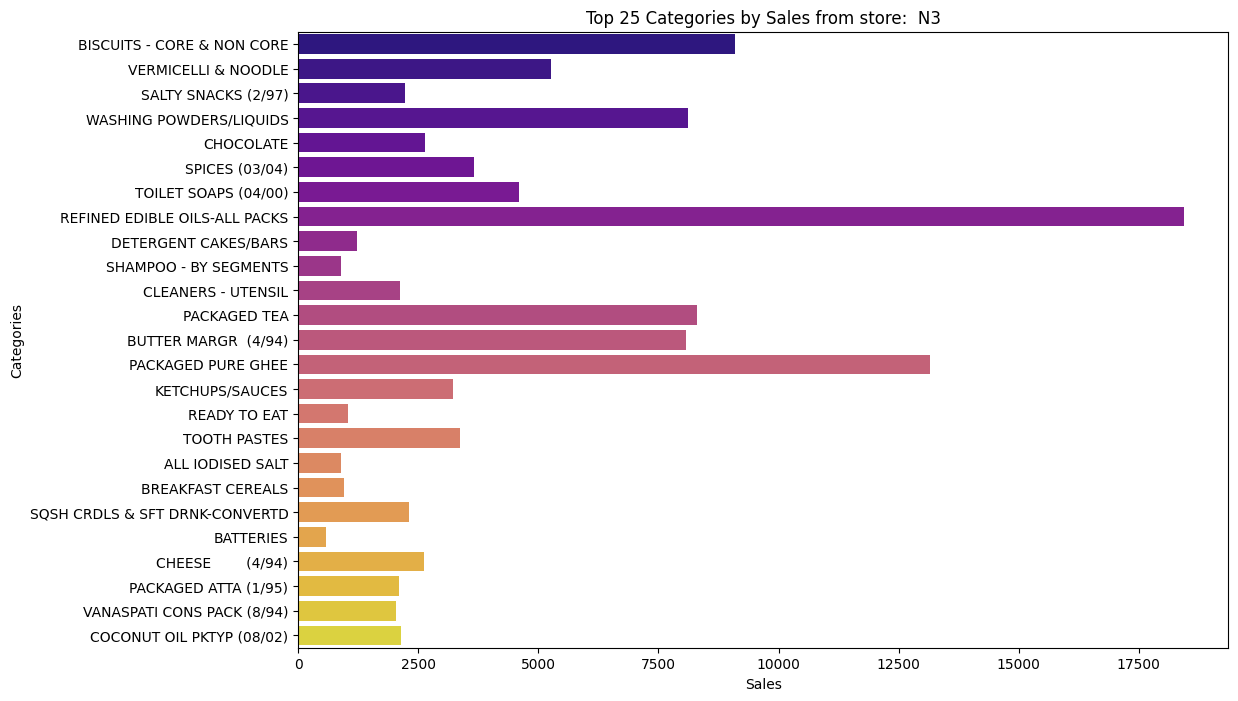

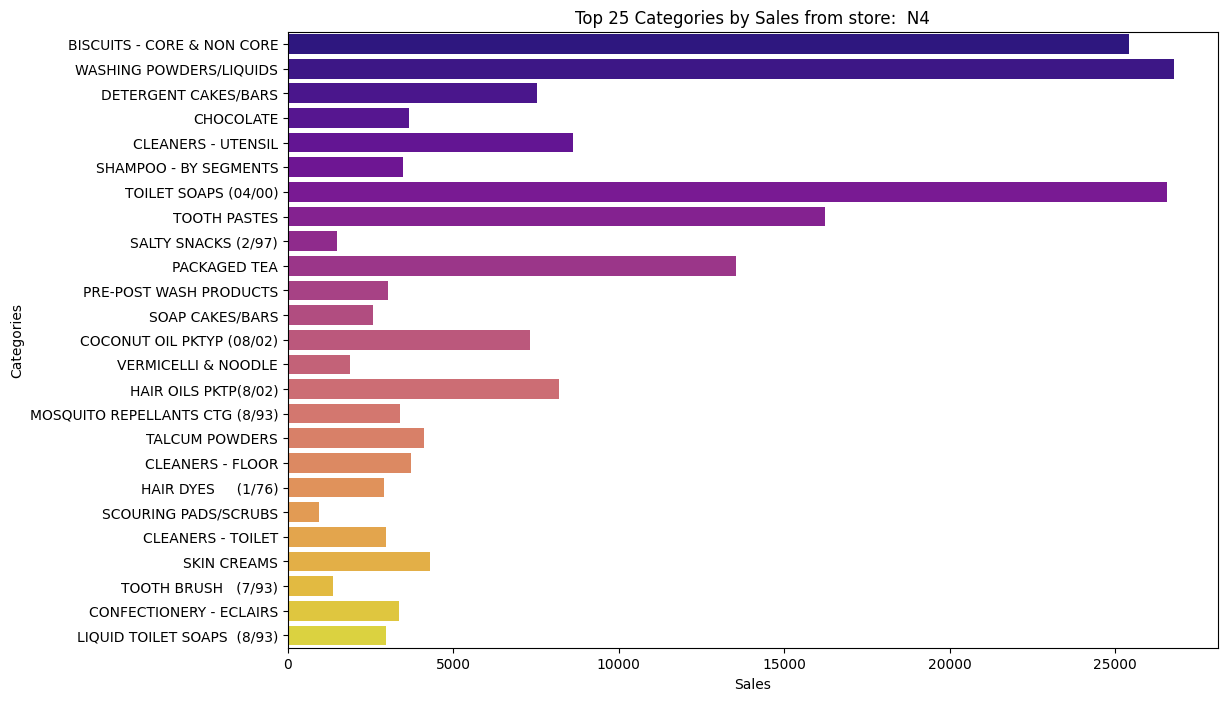

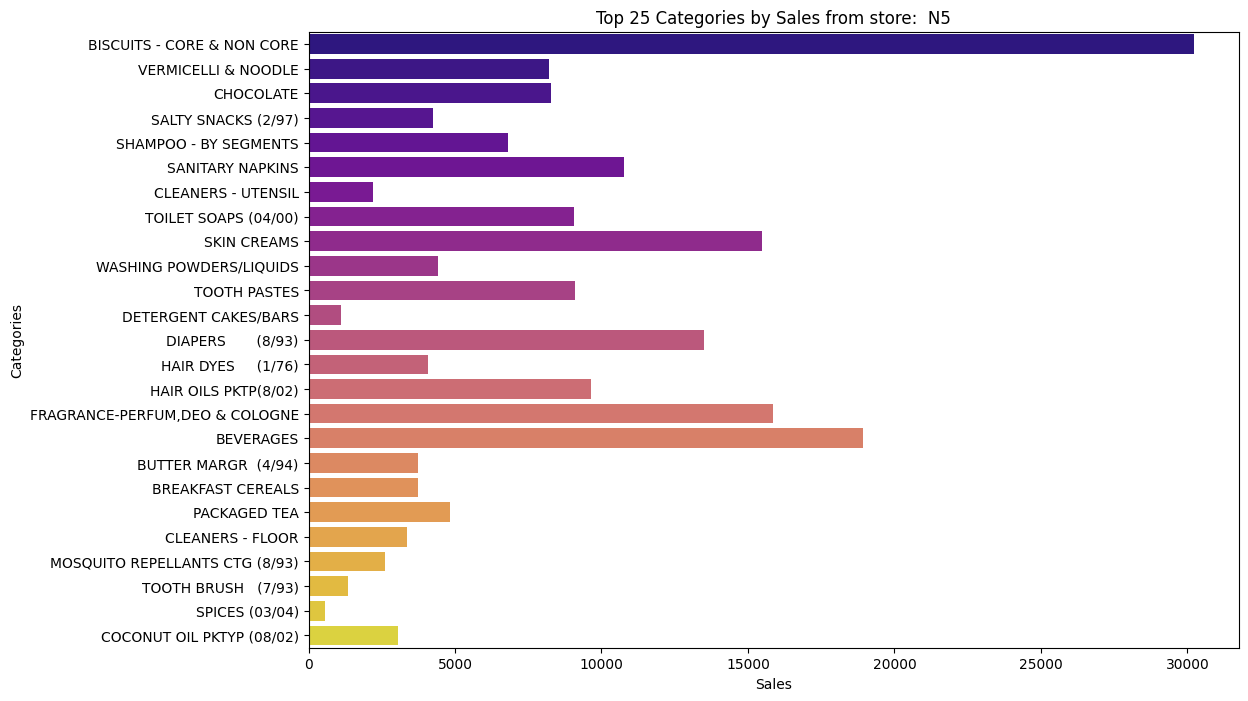

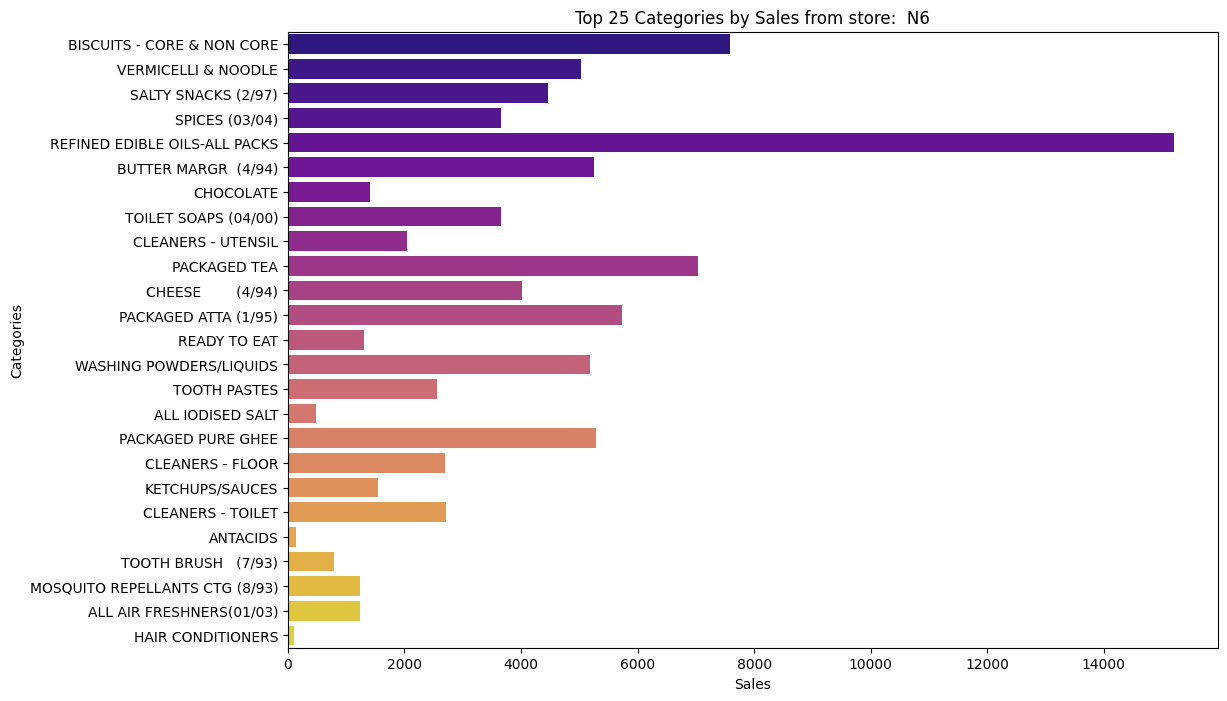

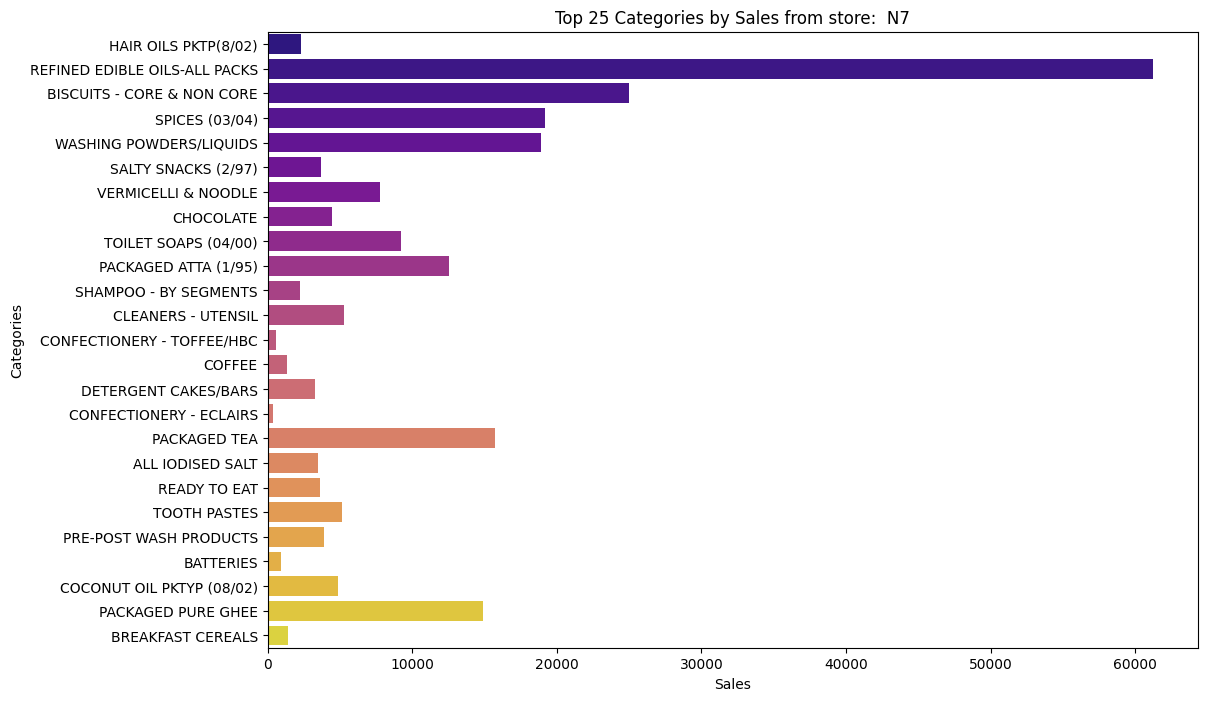

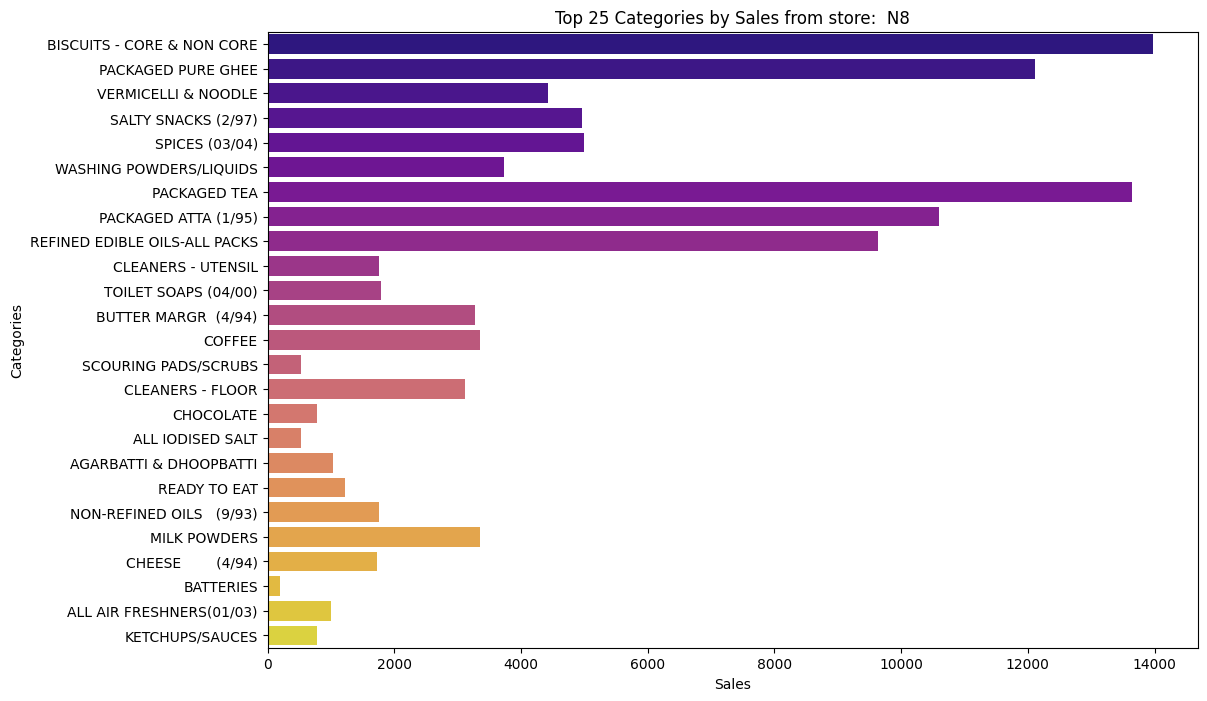

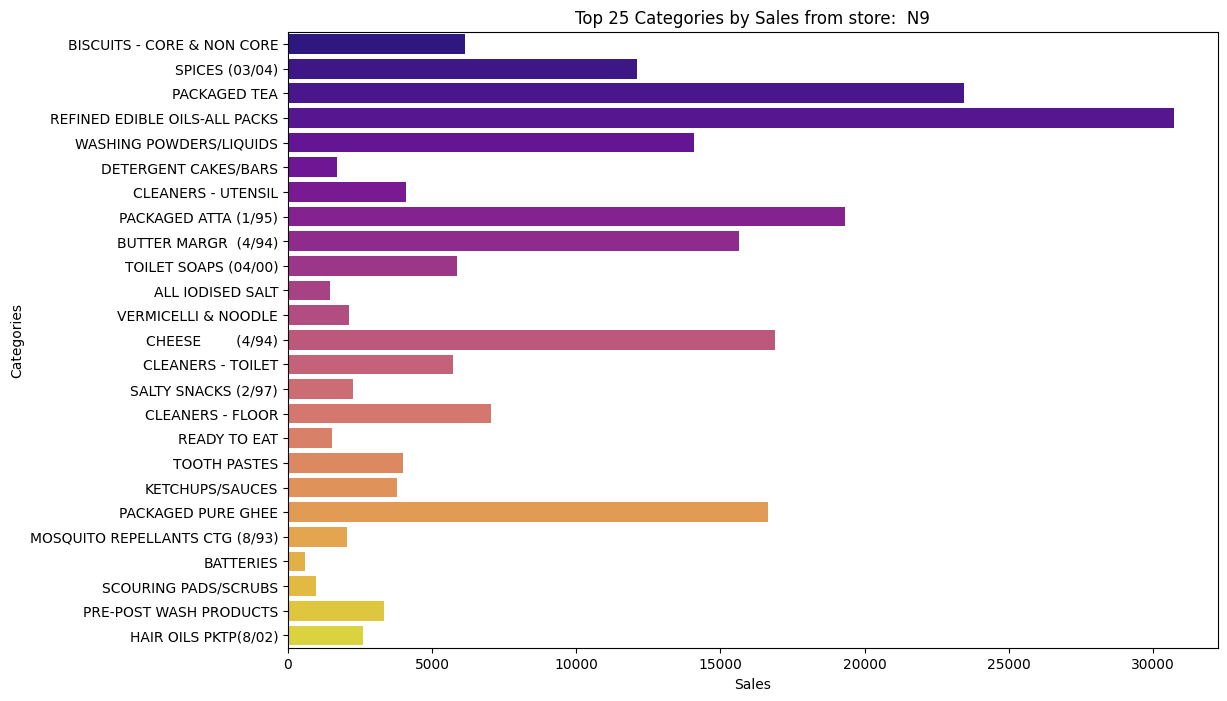

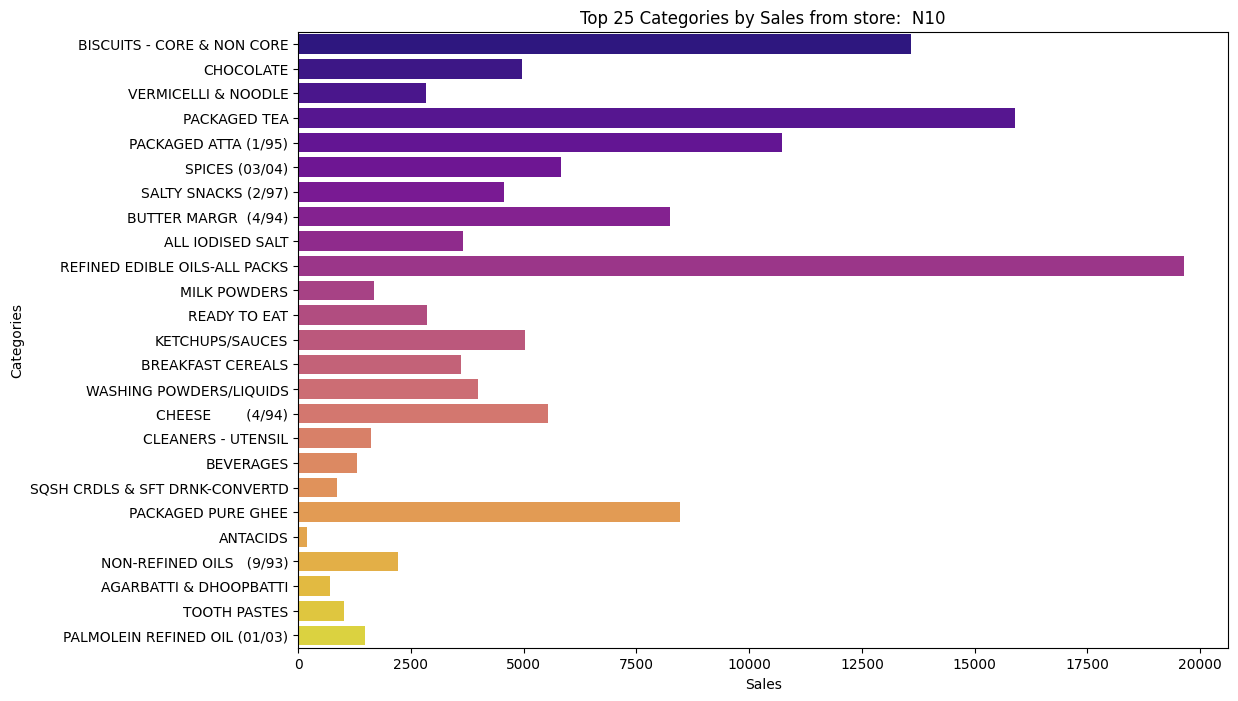

In [43]:
for i in merged.STORECODE.unique():
    x = merged.loc[data.STORECODE == i].groupby("GRP").sum().sort_values("QTY_x",ascending=False)[["VALUE","QTY_x"]][0:25]
    plt.figure(figsize=(12,8))
    sns.barplot(x='VALUE',y=x.index,data=x,palette='plasma')
    plt.title("Top 25 Categories by Sales from store:  " + i)
    plt.ylabel("Categories")
    plt.xlabel("Sales")

<ipython-input-45-c624cac6caca>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp_per_price_2 = merged.groupby("GRP").mean().sort_values("PRICE", ascending=True)[["PRICE","QTY_x"]][0:25]


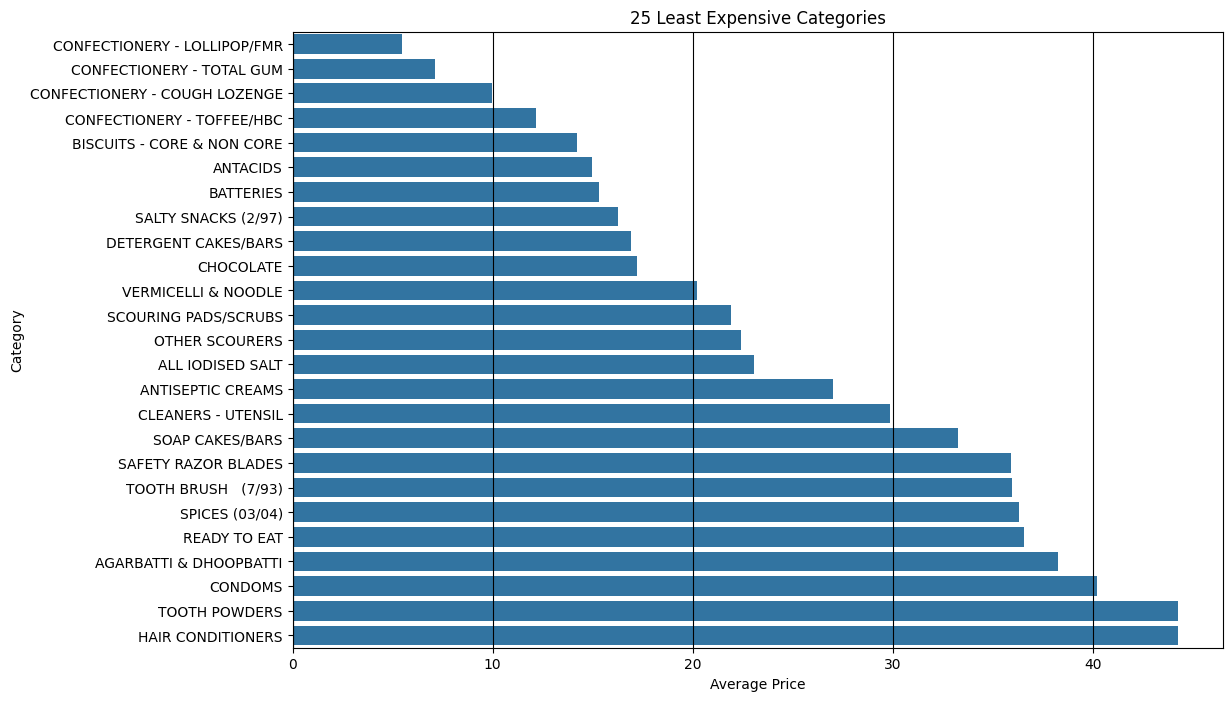

In [45]:
grp_per_price_2 = merged.groupby("GRP").mean().sort_values("PRICE", ascending=True)[["PRICE","QTY_x"]][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='PRICE',y=grp_per_price_2.index,data=grp_per_price_2)
plt.title("25 Least Expensive Categories")
plt.ylabel("Category")
plt.xlabel("Average Price")
plt.grid(axis='x',color='black')

In [50]:
store_qty = merged.groupby("UNIQUE_ID").sum()[['QTY_x','PRICE']]
store_qty['STORE'] = store_qty.index.str.split('_').str[0]
store_qty

<ipython-input-50-5d9d8913d339>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store_qty = merged.groupby("UNIQUE_ID").sum()[['QTY_x','PRICE']]


,QTY_x,PRICE,STORE
UNIQUE_ID,,,
N10_T1038,1.0,34.0,N10
N10_T1039,1.0,46.0,N10
N10_T1040,1.0,86.0,N10
N10_T1043,1.0,20.0,N10
N10_T1048,2.0,180.0,N10
...,...,...,...
N9_T940,1.0,200.0,N9
N9_T95,1.0,56.0,N9
N9_T953,28.0,885.0,N9


<ipython-input-54-39355fc457dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=units_by_store.index,y=units_by_store["QTY_x"],data=units_by_store,palette='Set1')


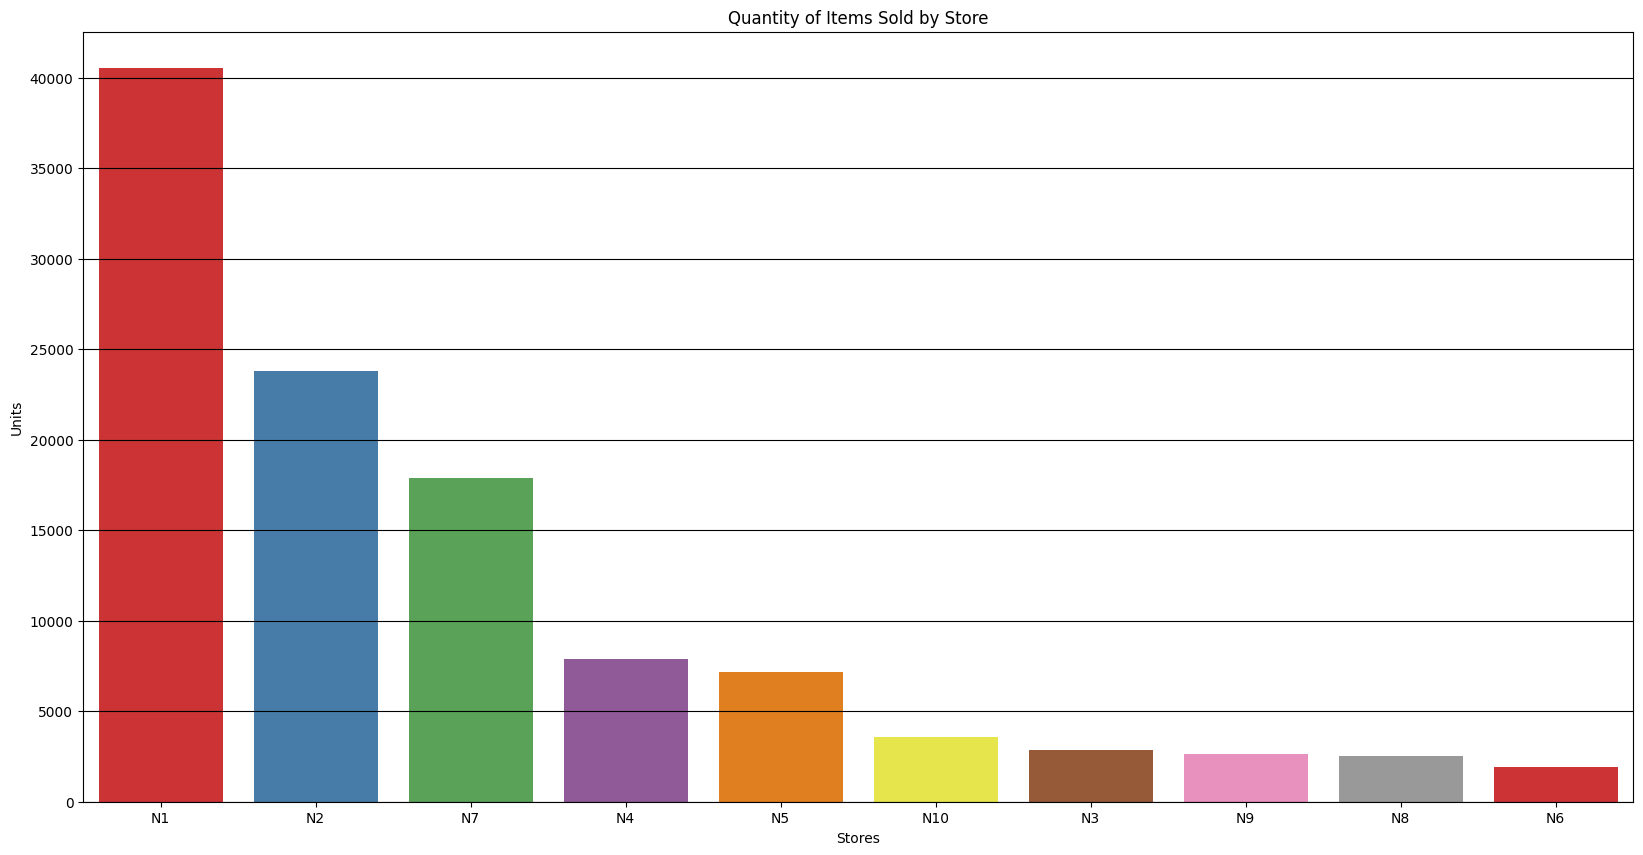

In [54]:
units_by_store = store_qty.groupby("STORE").sum().sort_values('QTY_x',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x=units_by_store.index,y=units_by_store["QTY_x"],data=units_by_store,palette='Set1')
plt.title("Quantity of Items Sold by Store")
plt.xlabel("Stores")
plt.ylabel("Units")
plt.grid(axis='y',color='black');

<Axes: >

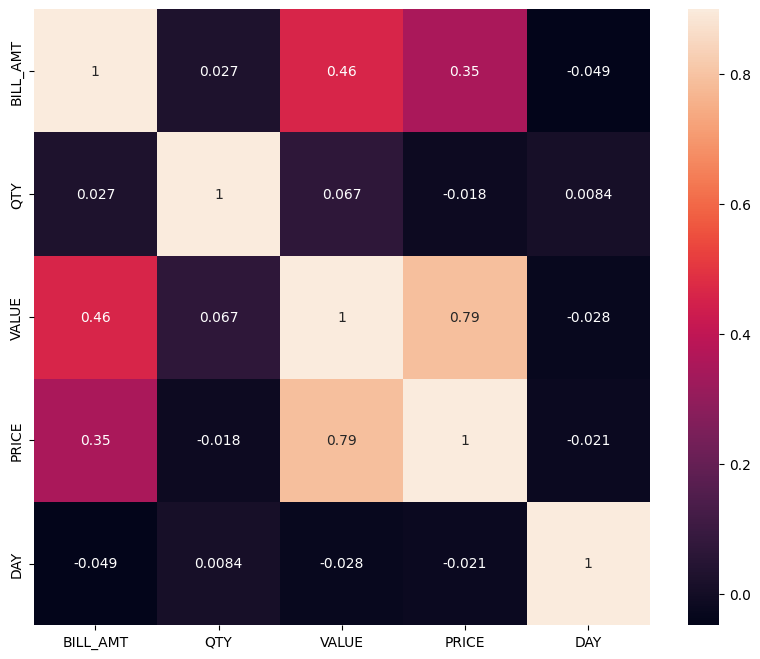

In [52]:
#heatmap_correlation
cm = data[['BILL_AMT','QTY','VALUE','PRICE','DAY']].corr()
f,ax=plt.subplots(figsize =(10,8))
sns.heatmap(cm, vmax=0.9,square =True,annot =True)

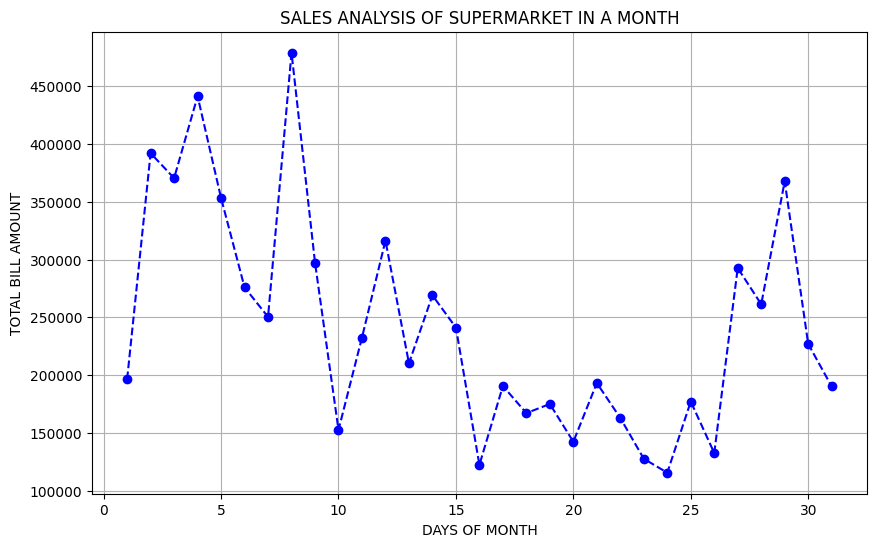

In [56]:
yearly_totals= data.groupby('DAY')['BILL_AMT'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(yearly_totals['DAY'], yearly_totals['BILL_AMT'], marker='o', linestyle='dashed', color='blue')
plt.title('SALES ANALYSIS OF SUPERMARKET IN A MONTH')
plt.xlabel('DAYS OF MONTH')
plt.ylabel('TOTAL BILL AMOUNT')
plt.grid(True)
plt.show()

# ***Sales by Month***

In [57]:
month_info = merged[["MONTH","UNIQUE_ID"]]
month_info

,MONTH,UNIQUE_ID
0,M1,N1_T375
1,M1,N1_T379
2,M1,N1_T381
3,M1,N1_T382
4,M1,N1_T384
...,...,...
26980,M3,N10_T5999
26981,M3,N10_T6007
26982,M3,N10_T6007
26983,M3,N10_T6007


In [58]:
monthly_sales = pd.merge(month_info,unique_sales,on="UNIQUE_ID")
monthly_sales

,MONTH,UNIQUE_ID,DAY_y,BILL_AMT_y,STORE
0,M1,N1_T375,4.0,225.0,N1
1,M1,N1_T379,4.0,95.0,N1
2,M1,N1_T381,4.0,10.0,N1
3,M1,N1_T382,4.0,108.0,N1
4,M1,N1_T384,4.0,19.0,N1
...,...,...,...,...,...
26980,M3,N10_T5999,31.0,10.0,N10
26981,M3,N10_T6007,31.0,88.0,N10
26982,M3,N10_T6007,31.0,88.0,N10
26983,M3,N10_T6007,31.0,88.0,N10


In [59]:
monthly_sales['N_MONTH'] = monthly_sales['MONTH'].apply(lambda x: x[1])
monthly_sales

,MONTH,UNIQUE_ID,DAY_y,BILL_AMT_y,STORE,N_MONTH
0,M1,N1_T375,4.0,225.0,N1,1
1,M1,N1_T379,4.0,95.0,N1,1
2,M1,N1_T381,4.0,10.0,N1,1
3,M1,N1_T382,4.0,108.0,N1,1
4,M1,N1_T384,4.0,19.0,N1,1
...,...,...,...,...,...,...
26980,M3,N10_T5999,31.0,10.0,N10,3
26981,M3,N10_T6007,31.0,88.0,N10,3
26982,M3,N10_T6007,31.0,88.0,N10,3
26983,M3,N10_T6007,31.0,88.0,N10,3


In [60]:
monthly_sales = monthly_sales.drop('MONTH',axis=1)
monthly_sales

,UNIQUE_ID,DAY_y,BILL_AMT_y,STORE,N_MONTH
0,N1_T375,4.0,225.0,N1,1
1,N1_T379,4.0,95.0,N1,1
2,N1_T381,4.0,10.0,N1,1
3,N1_T382,4.0,108.0,N1,1
4,N1_T384,4.0,19.0,N1,1
...,...,...,...,...,...
26980,N10_T5999,31.0,10.0,N10,3
26981,N10_T6007,31.0,88.0,N10,3
26982,N10_T6007,31.0,88.0,N10,3
26983,N10_T6007,31.0,88.0,N10,3


In [65]:
month_uq = monthly_sales.groupby('UNIQUE_ID').mean()
month_uq

<ipython-input-65-f7f667af60c0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_uq = monthly_sales.groupby('UNIQUE_ID').mean()


,DAY_y,BILL_AMT_y,N_MONTH
UNIQUE_ID,,,
N10_T1038,5.0,34.0,1.0
N10_T1039,5.0,46.0,1.0
N10_T1040,5.0,86.0,1.0
N10_T1043,5.0,20.0,1.0
N10_T1048,5.0,180.0,1.0
...,...,...,...
N9_T940,2.0,200.0,3.0
N9_T95,7.0,56.0,1.0
N9_T953,3.0,1656.0,3.0


In [63]:
monthly_sales['N_MONTH'] = pd.to_numeric(monthly_sales['N_MONTH'])

<ipython-input-68-9036d30cb520>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=m_sales.index,y='BILL_AMT_y',data=m_sales,palette="Set2")


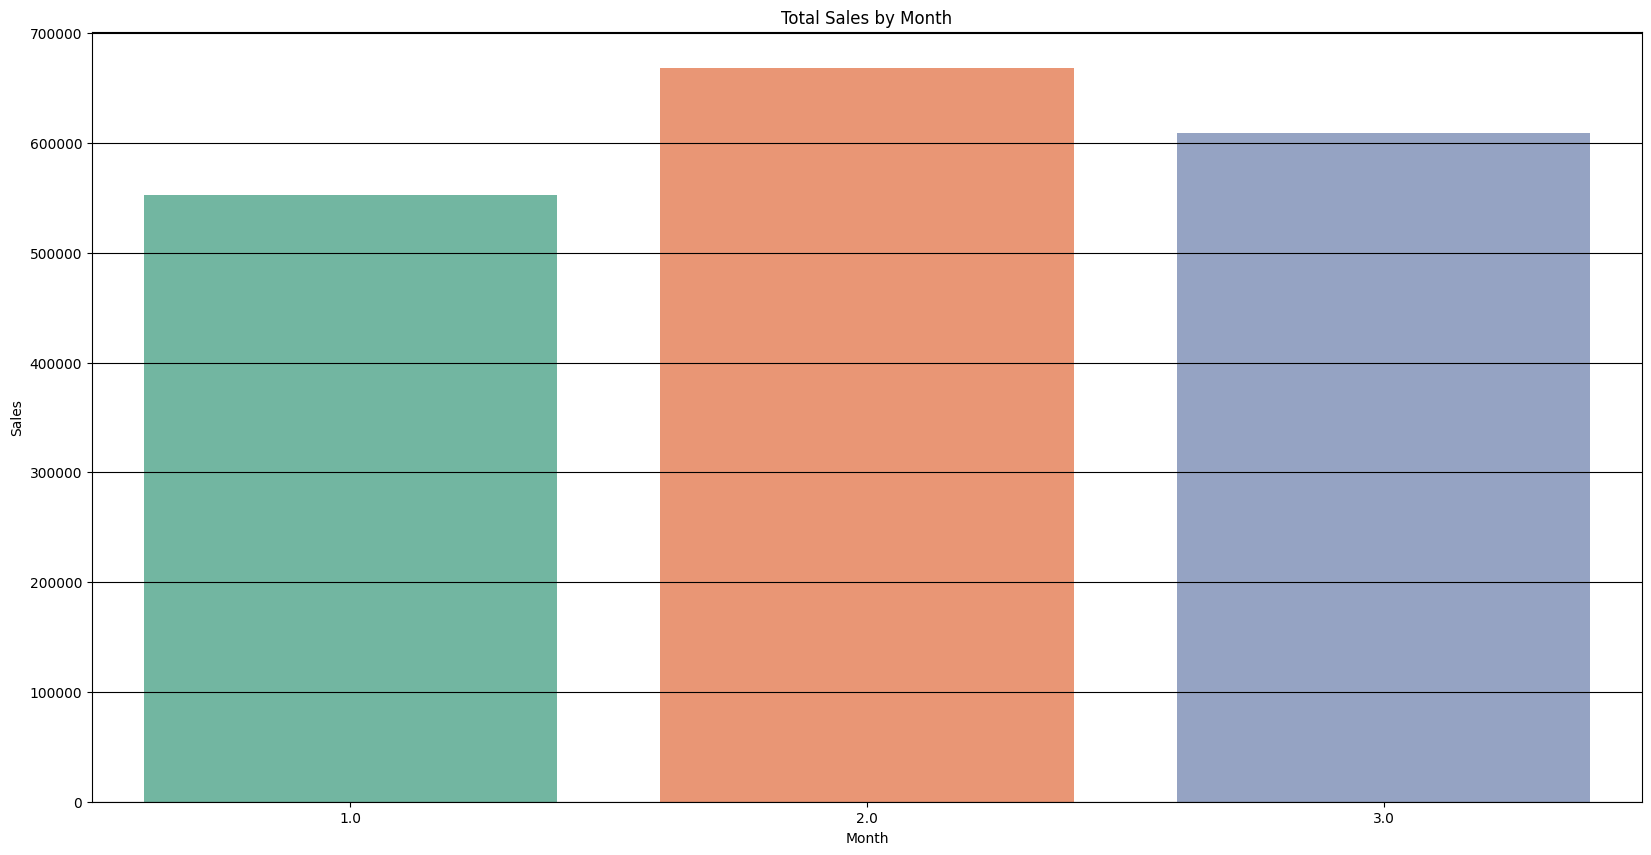

In [68]:
m_sales = month_uq.groupby('N_MONTH').sum()
plt.figure(figsize=(20,10))
sns.barplot(x=m_sales.index,y='BILL_AMT_y',data=m_sales,palette="Set2")
plt.title("Total Sales by Month")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(axis='y',color='black');